In [1]:
from dlisio import dlis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os
from pathlib import Path
import traceback
import glob
import sys

pd.set_option('display.max_rows', 50)

# extracting lab 

In [2]:
# loading lab_data from an Excel file
name = 'HRDH_1119'
lab_data = pd.read_excel("../HRDH_LAB_DATA.xlsx", sheet_name=name, index_col='Depth_ft')

lab_data


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
10742.5,20,0.0,1.5,0,0,0.1,0.0,0,0,0,...,30.15,0.00,0.00,68.40,0,0,0.15,0,0.59,0
10743.4,21,0.0,0.7,0,0,0.0,0.0,0,0,0,...,30.49,0.01,0.07,68.28,0,0,0.09,0,0.55,0
10744.3,22,0.0,3.0,0,0,0.1,0.0,0,0,0,...,27.48,0.00,0.14,70.30,0,0,0.19,0,0.60,0
10745.4,23,0.0,22.8,0,0,0.1,0.3,0,0,0,...,17.83,0.07,0.35,71.44,0,0,0.46,0,0.46,0
10746.5,24,0.0,3.7,0,0,0.1,0.1,0,0,0,...,28.19,0.03,0.16,68.81,0,0,0.17,0,0.54,0
10760.3,36,0.0,92.7,0,0,0.4,1.2,0,0,0,...,2.18,0.16,0.40,76.64,0,0,0.68,0,0.12,0
10761.4,37,0.0,64.5,0,0,0.1,0.5,0,0,0,...,8.75,0.16,0.29,74.65,0,0,0.64,0,0.47,0
10762.4,38,0.0,47.4,0,0,0.1,0.4,0,0,0,...,12.00,0.07,0.23,73.48,0,0,0.44,0,0.69,0
10767.7,43,0.0,56.7,0,0,0.1,0.9,0,0,0,...,10.88,0.10,0.28,74.37,0,0,0.38,0,0.49,0


In [3]:
# convert data types to float
lab_data = lab_data.apply(pd.to_numeric, errors='coerce')


print("\n📋 DATAFRAME STRUCTURE:")
print(f"Index: {lab_data.index.name} (shape: {lab_data.index.shape})")
print(f"Columns: {list(lab_data.columns)} (shape: {lab_data.shape},)")
# print(f"Data types:\n{lab_data.info()}\n")


lab_data


📋 DATAFRAME STRUCTURE:
Index: Depth_ft (shape: (18,))
Columns: ['Sample_ID', 'XRD_Calcite', 'XRD_Dolomite', 'XRD_Ankerite', 'XRD_Siderite', 'XRD_Quartz', 'XRD_Plagioclase', 'XRD_K-Feldspar', 'XRD_Illite/Mica', 'XRD_Smectite', 'XRD_Kaolinite', 'XRD_Chlorite', 'XRD_Mixed Clay', 'XRD_Anhydrite', 'XRD_Gypsum', 'XRD_Pyrite', 'XRD_Hematite', 'XRF_Na', 'XRF_Mg', 'XRF_Al', 'XRF_Si', 'XRF_P', 'XRF_S', 'XRF_Cl', 'XRF_K', 'XRF_Ca', 'XRF_Ti', 'XRF_Mn', 'XRF_Fe', 'XRF_Zr', 'XRF_Sr', 'XRF_Ba'] (shape: (18, 32),)


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
10742.5,20,0.0,1.5,0,0,0.1,0.0,0,0,0,...,30.15,0.00,0.00,68.40,0,0,0.15,0,0.59,0
10743.4,21,0.0,0.7,0,0,0.0,0.0,0,0,0,...,30.49,0.01,0.07,68.28,0,0,0.09,0,0.55,0
10744.3,22,0.0,3.0,0,0,0.1,0.0,0,0,0,...,27.48,0.00,0.14,70.30,0,0,0.19,0,0.60,0
10745.4,23,0.0,22.8,0,0,0.1,0.3,0,0,0,...,17.83,0.07,0.35,71.44,0,0,0.46,0,0.46,0
10746.5,24,0.0,3.7,0,0,0.1,0.1,0,0,0,...,28.19,0.03,0.16,68.81,0,0,0.17,0,0.54,0
10760.3,36,0.0,92.7,0,0,0.4,1.2,0,0,0,...,2.18,0.16,0.40,76.64,0,0,0.68,0,0.12,0
10761.4,37,0.0,64.5,0,0,0.1,0.5,0,0,0,...,8.75,0.16,0.29,74.65,0,0,0.64,0,0.47,0
10762.4,38,0.0,47.4,0,0,0.1,0.4,0,0,0,...,12.00,0.07,0.23,73.48,0,0,0.44,0,0.69,0
10767.7,43,0.0,56.7,0,0,0.1,0.9,0,0,0,...,10.88,0.10,0.28,74.37,0,0,0.38,0,0.49,0


# extracting log dlis

In [4]:
import sys

sys.path.append(r"c:\Users\alghziy\Desktop\Analysis\colab\HRDH")
from Module import load_full_dsl_log, dlis_to_df, load_dlis_files_from_list
# Path to the DLIS log file 
# dir_path = r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_*"


# log_df, meta = load_full_dsl_log(
#     root_dir=dir_path,
#     frame_idx=0,
#     channels=None 
# )
"""
"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\1200\OH\WL\Field\Deliverables\HRDH_1119_0_21MAY2012_ZDL-CN-DSL_RP_BA.dlis"
"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\1200\OH\WL\Field\Deliverables\HRDH_1119_0_21MAY2012_ZDL-CN-DSL_ML_BA.dlis"
"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\8375\WL\Field\Deliverables\HRDH_1119_0_29MAY2012_ZDL-CN-DSL_RP_BA.dlis"
"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\8375\WL\Field\Deliverables\HRDH_1119_0_29MAY2012_ZDL-CN-DSL_ML_BA.dlis"
"""

# put this in a list
dlis_file_paths = [
    Path(r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\8375\WL\Field\Deliverables\HRDH_1119_0_29MAY2012_ZDL-CN-DSL_RP_BA.dlis"),
    Path(r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\8375\WL\Field\Deliverables\HRDH_1119_0_29MAY2012_ZDL-CN-DSL_ML_BA.dlis"),
    Path(r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\1200\OH\WL\Field\Deliverables\HRDH_1119_0_21MAY2012_ZDL-CN-DSL_RP_BA.dlis"),
    Path(r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\1200\OH\WL\Field\Deliverables\HRDH_1119_0_21MAY2012_ZDL-CN-DSL_ML_BA.dlis")
]

log_df, meta = load_dlis_files_from_list(dlis_file_paths)

# Display summary
print(f"\n📊 LOADING SUMMARY:")
# print(f"   • Files found: {meta['summary']['total_files_found']}")
# print(f"   • DSL files: {meta['summary']['dsl_files_found']}")
# print(f"   • Successfully loaded: {meta['summary']['files_loaded']}")
# print(f"   • Failed to load: {meta['summary']['files_failed']}")
# print(f"   • Final shape: {meta['summary']['final_shape']}")

if not log_df.empty:
    print(f"   • Depth range: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
    print(f"   • Available channels: {list(log_df.columns)}")
else:
    print("   • No data loaded - check errors above")

log_df    

<>:15: SyntaxWarning: invalid escape sequence '\G'
<>:15: SyntaxWarning: invalid escape sequence '\G'
C:\Users\alghziy\AppData\Local\Temp\ipykernel_15720\3801143476.py:15: SyntaxWarning: invalid escape sequence '\G'
  "\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\1200\OH\WL\Field\Deliverables\HRDH_1119_0_21MAY2012_ZDL-CN-DSL_RP_BA.dlis"


🔍 LOADING 4 DLIS FILES FROM LIST

📋 STEP 1: VALIDATING FILE PATHS
------------------------------
✅  1. HRDH_1119_0_29MAY2012_ZDL-CN-DSL_RP_BA.dlis (2.0 MB)
✅  2. HRDH_1119_0_29MAY2012_ZDL-CN-DSL_ML_BA.dlis (4.8 MB)
✅  3. HRDH_1119_0_21MAY2012_ZDL-CN-DSL_RP_BA.dlis (1.8 MB)
✅  4. HRDH_1119_0_21MAY2012_ZDL-CN-DSL_ML_BA.dlis (14.7 MB)

📊 VALIDATION SUMMARY:
   • Valid files: 4
   • Invalid files: 0

🔧 STEP 2: LOADING DLIS FILES
------------------------------

📁 Loading file 1/4: HRDH_1119_0_29MAY2012_ZDL-CN-DSL_RP_BA.dlis
🔍 STEP 1: FILE VALIDATION
✅ File found: HRDH_1119_0_29MAY2012_ZDL-CN-DSL_RP_BA.dlis
   • Size: 2.0 MB
   • Path: \\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\8375\WL\Field\Deliverables\HRDH_1119_0_29MAY2012_ZDL-CN-DSL_RP_BA.dlis

🔍 STEP 2: DLIS FILE LOADING
✅ DLIS file loaded successfully
   • Number of logical files: 1
   • Using logical file: unnamed

🔍 STEP 3: FRAME VALIDATION
✅ Found 1 frame(s)
   • Frame 0

,BIT,BVOL,CAL,CALZ,CHT,CN,CNC,CVOL,FRAMENO,GR,...,SSD,SSN,TEN,TH,TTEN,U,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
8936.75,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.552994,-999.25,-999.25,-999.25
8937.00,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.614517,-999.25,-999.25,-999.25
8937.25,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,3,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.607208,-999.25,-999.25,-999.25
8937.50,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,4,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.554749,-999.25,-999.25,-999.25
8937.75,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,5,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,205.494461,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579.50,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2948,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25
11579.75,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2949,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25
11580.00,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2950,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25


In [5]:
# You now have a complete log dataset:
print(f"📊 Final log data: {log_df.shape}")
print(f"📏 Depth coverage: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
print(f"🔍 Available channels: {len(log_df.columns)} {list(log_df.columns)}")

📊 Final log data: (10576, 36)
📏 Depth coverage: 8936.8 - 11580.5 ft
🔍 Available channels: 36 ['BIT', 'BVOL', 'CAL', 'CALZ', 'CHT', 'CN', 'CNC', 'CVOL', 'FRAMENO', 'GR', 'GRSL', 'HRD1', 'HRD2', 'K', 'KTH', 'LSN', 'PE', 'QPKS', 'RTHK', 'RTHU', 'RUK', 'SFT2', 'SHR', 'SLGN', 'SLTM', 'SPD', 'SSD', 'SSN', 'TEN', 'TH', 'TTEN', 'U', 'WTBH', 'ZCOR', 'ZDEN', 'ZDNC']


# cleaning log

In [6]:

# -999.25 are usually null values inside dlis files
null_values = -999.25

# Replace -999.25 with NaN FIRST
log_df_clean = log_df.replace(null_values, np.nan)
log_df_clean




,BIT,BVOL,CAL,CALZ,CHT,CN,CNC,CVOL,FRAMENO,GR,...,SSD,SSN,TEN,TH,TTEN,U,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
8936.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.552994,NaN,NaN,NaN
8937.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.614517,NaN,NaN,NaN
8937.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.607208,NaN,NaN,NaN
8937.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.554749,NaN,NaN,NaN
8937.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,205.494461,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579.50,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2948,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11579.75,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2949,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11580.00,8.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2950,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# DEPTH ANALYSIS: Compare sampling characteristics between log and lab data
print("=" * 50)

print("Log depths summary:")
print(f"Count: {len(log_df_clean.index)}")  
print(f"Range: {log_df_clean.index.min():.1f} - {log_df_clean.index.max():.1f} ft\n")  
log_step = np.diff(log_df_clean.index).mean()  
print(f"Depth step (mean): {log_step:.2f} ft \nMin Step: {np.diff(log_df_clean.index).min():.2f} \nMax Step: {np.diff(log_df_clean.index).max():.2f}")  


print("=" * 50)


print("Lab depths summary:")
print(f"Count: {len(lab_data.index)}") 
print(f"Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft\n")  
lab_step = np.diff(lab_data.index).mean()  
print(f"Depth step (mean): {lab_step:.2f} ft \nMin Step: {np.diff(lab_data.index).min():.2f} \nMax Step: {np.diff(lab_data.index).max():.2f}")  


Log depths summary:
Count: 10576
Range: 8936.8 - 11580.5 ft

Depth step (mean): 0.25 ft 
Min Step: 0.25 
Max Step: 0.25
Lab depths summary:
Count: 18
Range: 10742.5 - 10866.5 ft

Depth step (mean): 7.29 ft 
Min Step: 0.90 
Max Step: 62.70


# Log MISSING DATA SUMMARY

In [8]:
#Missing Data Summary for log data
# Calculate missingness summary
null_pct = log_df_clean.isna().mean() * 100

# Show all columns with their percentages
missing_cols = null_pct.sort_values(ascending=False)

# Show aggregate summary statistics for many columns
print("🔍 MISSING DATA SUMMARY:")
print("=" * 50)
print(f"Log DATASET: {log_df_clean.shape[0]} samples × {log_df_clean.shape[1]} curves")

print(f"Total columns: {len(null_pct)}")
print(f"Columns with missing data: {len(missing_cols)}")
print(f"Max missing %: {null_pct.max():.1f}%")
print(f"Avg missing %: {null_pct.mean():.1f}%")

# Quick check for duplicates
# print("\n🔍 DUPLICATE DEPTH CHECK:")
# print(f"Log duplicates: {log_df_clean.index.duplicated().sum()}")
# print(f"Lab duplicates: {lab_data.index.duplicated().sum()}")

# # Show unique vs total counts
# print(f"\nLog depths - Total: {len(log_df_clean)}, Unique: {log_df_clean.index.nunique()}")
# print(f"Lab depths - Total: {len(lab_data)}, Unique: {lab_data.index.nunique()}")

print("=" * 50)


# Show detailed breakdown for all columns
# for col, pct in missing_cols.items():
#     count = log_df_clean[col].isna().sum()
#     print(f"• {col:<20}: {pct:>6.1f}% ({count} missing)")




🔍 MISSING DATA SUMMARY:
Log DATASET: 10576 samples × 36 curves
Total columns: 36
Columns with missing data: 36
Max missing %: 4.5%
Avg missing %: 3.4%


# OVERLAP

In [9]:
#   OVERLAP ANALYSIS - 
print("🔧  OVERLAP ZONE ANALYSIS:")
print("=" * 50)

# 1.
print(f"📏  Depth Ranges:")
print(f"Log Range: {log_df_clean.index.min():.1f} - {log_df_clean.index.max():.1f} ft")  
print(f"Lab Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft")  

# Calculate overlap zone boundaries (unchanged)
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start

print(f"Overlap Range: {overlap_start:.1f} - {overlap_end:.1f} ft")
print(f"Span of overlap: {overlap_span:.1f} ft")

# Get samples in overlap zone (using different variable names to avoid confusion)
log_overlap = log_df_clean[(log_df_clean.index >= overlap_start) & (log_df_clean.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

# 2. FIX: Correct min/max bug in step statistics
if len(log_overlap) > 1:
    log_step_overlap = np.diff(log_overlap.index)
    print(f"\n✅ CORRECTED LOG STEP IN OVERLAP:")
    print(f"Step (mean): {log_step_overlap.mean():.2f} ft")
    print(f"Step Min: {log_step_overlap.min():.2f} ft")
    print(f"Step Max: {log_step_overlap.max():.2f} ft")  # ✅ FIXED: was .min()

if len(lab_overlap) > 1:
    lab_step_overlap = np.diff(lab_overlap.index)
    print(f"\n✅ CORRECTED LAB STEP IN OVERLAP:")
    print(f"Step (mean): {lab_step_overlap.mean():.2f} ft")
    print(f"Step Min: {lab_step_overlap.min():.2f} ft")
    print(f"Step Max: {lab_step_overlap.max():.2f} ft")  # ✅ FIXED: was .min()

print(f"\n📊 OVERLAP SUMMARY:")
print(f"Log samples in overlap: {len(lab_overlap):,}")
print(f"Lab samples in overlap: {len(lab_overlap)}")
print("=" * 50)

🔧  OVERLAP ZONE ANALYSIS:
📏  Depth Ranges:
Log Range: 8936.8 - 11580.5 ft
Lab Range: 10742.5 - 10866.5 ft
Overlap Range: 10742.5 - 10866.5 ft
Span of overlap: 124.0 ft

✅ CORRECTED LOG STEP IN OVERLAP:
Step (mean): 0.25 ft
Step Min: 0.25 ft
Step Max: 0.25 ft

✅ CORRECTED LAB STEP IN OVERLAP:
Step (mean): 7.29 ft
Step Min: 0.90 ft
Step Max: 62.70 ft

📊 OVERLAP SUMMARY:
Log samples in overlap: 18
Lab samples in overlap: 18


# join

In [10]:
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd
from Module import match_lab_to_log

tolerance_ft = 1

joined = match_lab_to_log(log_df_clean, lab_overlap, tol=tolerance_ft)

if len(joined) > 0:
    print(f"\n✅ Found {len(joined)} matches with {tolerance_ft} ft tolerance")
    
    # Show statistics
    print(f"\nMATCH STATISTICS:")
    print(f"Average distance: {joined['Distance'].mean():.3f} ft")
    print(f"Max distance: {joined['Distance'].max():.3f} ft")
    print(f"Exact matches: {(joined['Distance'] == 0).sum()}")
    print(f"Near matches: {(joined['Distance'] > 0).sum()}")
    
    # Save results for verification
    verification_df = joined[['Lab_Depth', 'Log_Depth', 'Distance']].copy()
    verification_df.to_csv('verification_matches.csv', index=False)
    print(f"\n💾 Saved verification data to 'verification_matches.csv'")
    
else:
    print(f"\n❌ No matches found with {tolerance_ft} ft tolerance")
    print("Trying with larger tolerance...")
    
    # Try with diffrent ft tolerance
    joined = match_lab_to_log(log_df_clean, lab_overlap, tol=1)

joined


FUNCTION START - INPUT VALIDATION:
Log DataFrame shape: (10576, 36)
Lab DataFrame shape: (18, 32)
After deduplication - Log: 10576, Lab: 18
Lab depths range: 10742.50 - 10866.50
Log depths range: 8936.75 - 11580.50
Tolerance: 1 ft
Valid matches found: 18/18
Min distance: 0.00 ft
Max distance: 0.10 ft

MATCH VERIFICATION:
   Match 1: Lab 10742.50 → Log 10742.50 (Δ0.00 ft)
   Match 2: Lab 10743.40 → Log 10743.50 (Δ0.10 ft)
   Match 3: Lab 10744.30 → Log 10744.25 (Δ0.05 ft)
   Match 4: Lab 10745.40 → Log 10745.50 (Δ0.10 ft)
   Match 5: Lab 10746.50 → Log 10746.50 (Δ0.00 ft)
   Match 6: Lab 10760.30 → Log 10760.25 (Δ0.05 ft)
   Match 7: Lab 10761.40 → Log 10761.50 (Δ0.10 ft)
   Match 8: Lab 10762.40 → Log 10762.50 (Δ0.10 ft)
   Match 9: Lab 10767.70 → Log 10767.75 (Δ0.05 ft)
   Match 10: Lab 10769.40 → Log 10769.50 (Δ0.10 ft)
   Match 11: Lab 10770.30 → Log 10770.25 (Δ0.05 ft)
   Match 12: Lab 10791.30 → Log 10791.25 (Δ0.05 ft)
   Match 13: Lab 10794.70 → Log 10794.75 (Δ0.05 ft)
   Match 

,Lab_Depth,Lab_Sample_ID,Lab_XRD_Calcite,Lab_XRD_Dolomite,Lab_XRD_Ankerite,Lab_XRD_Siderite,Lab_XRD_Quartz,Lab_XRD_Plagioclase,Lab_XRD_K-Feldspar,Lab_XRD_Illite/Mica,...,Log_TEN,Log_TH,Log_TTEN,Log_U,Log_WTBH,Log_ZCOR,Log_ZDEN,Log_ZDNC,Distance,Match_Type
0,10742.5,20,0.0,1.5,0,0,0.1,0.0,0,0,...,-18.314127,0.508897,4011.039795,0.243608,231.910812,-0.004835,2.946764,2.935852,0.00,Exact
1,10743.4,21,0.0,0.7,0,0,0.0,0.0,0,0,...,-8.904570,0.924742,4020.750732,0.017326,232.153702,-0.009443,2.929054,2.918051,0.10,Near
2,10744.3,22,0.0,3.0,0,0,0.1,0.0,0,0,...,-7.741385,1.089209,4022.000977,0.017326,232.229660,-0.013279,2.925855,2.914831,0.05,Near
3,10745.4,23,0.0,22.8,0,0,0.1,0.3,0,0,...,-19.012171,1.145308,4011.212646,0.149796,231.951355,-0.021489,2.901159,2.890035,0.10,Near
4,10746.5,24,0.0,3.7,0,0,0.1,0.1,0,0,...,-21.624130,1.143226,4009.110596,0.528289,232.206070,-0.014056,2.889534,2.878369,0.00,Exact
5,10760.3,36,0.0,92.7,0,0,0.4,1.2,0,0,...,-7.496143,0.155060,4028.713623,1.352696,232.540802,0.035357,2.835279,2.824072,0.05,Near
6,10761.4,37,0.0,64.5,0,0,0.1,0.5,0,0,...,-33.222733,1.037934,4003.679932,0.919734,232.635147,-0.001998,2.858706,2.847458,0.10,Near
7,10762.4,38,0.0,47.4,0,0,0.1,0.4,0,0,...,-24.483074,1.458094,4013.325195,0.640219,232.755386,-0.005504,2.850384,2.839087,0.10,Near
8,10767.7,43,0.0,56.7,0,0,0.1,0.9,0,0,...,-16.274426,2.979798,4024.396729,0.017326,232.595383,0.040444,2.688171,2.676608,0.05,Near
9,10769.4,45,0.0,58.2,0,0,0.3,0.5,0,0,...,-0.972934,3.333236,4040.246338,0.017326,232.976761,0.042406,2.700993,2.689373,0.10,Near


# DATA INTEGRATION ASSESSMENT

In [11]:
# COMPREHENSIVE DATA INTEGRATION ASSESSMENT
print("COMPREHENSIVE DATA INTEGRATION ASSESSMENT")
print("=" * 60)

# 1. Basic Statistics
lab_coverage = (len(joined) / len(lab_data)) * 100
log_coverage = (len(joined) / len(log_df_clean)) * 100

lab_span = lab_data.index.max() - lab_data.index.min()
log_span = log_df_clean.index.max() - log_df_clean.index.min()

matched_span = joined['Lab_Depth'].max() - joined['Lab_Depth'].min()
avg_depth_diff = abs(joined['Log_Depth'] - joined['Lab_Depth']).mean()

print(f"📊 DATA OVERVIEW:")
print(f"   • Lab samples: {len(lab_data)} | Log samples: {len(log_df_clean)}")
print(f"   • Matched pairs: {len(joined)}")
# print(f"   • Data ratio: 1 lab sample per {len(log_df_clean)//len(lab_data)} log samples") not usful

# 2. Coverage Analysis
print(f"\n📈 COVERAGE ANALYSIS:")
print(f"   • Lab utilization: {lab_coverage:.1f}% ({len(joined)}/{len(lab_data)})")
print(f"   • Log coverage: {log_coverage:.1f}% ({len(joined)}/{len(log_df_clean)})")

# 3. Depth Range Analysis
print(f"\n📏 DEPTH RANGE ANALYSIS:")
print(f"   • Lab data span: {lab_span:.1f} ft")
print(f"   • Log data span: {log_span:.1f} ft")
print(f"   • Matched (joined) span: {matched_span:.1f} ft")
print(f"   • Lab covers {(lab_span/log_span)*100:.1f}% of well depth")

# 4. Depth Accuracy
print(f"\n🎯 DEPTH ACCURACY:")
print(f"   • Average depth difference: {avg_depth_diff:.2f} ft")
print(f"   • Max depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).max():.2f} ft")
print(f"   • Min depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).min():.2f} ft")


# 6. Overlap Analysis
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start
print(f"\n🔄 OVERLAP ZONE ANALYSIS:")
print(f"Overlap zone: {overlap_start:.1f} - {overlap_end:.1f} ft")

# Get samples in overlap zone - FIXED the bug
log_overlap = joined[(joined.index >= overlap_start) & (joined.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

print(f"Log samples in overlap: {len(log_overlap)}")
print(f"Lab samples in overlap: {len(lab_overlap)}")



# 7. Quality Assessment
print(f"\n⭐ QUALITY ASSESSMENT:")
if lab_coverage >= 80:
    print(f"   ✅ Lab utilization: EXCELLENT ({lab_coverage:.1f}%)")
elif lab_coverage >= 60:
    print(f"   ⚠️ Lab utilization: GOOD ({lab_coverage:.1f}%)")
else:
    print(f"   ❌ Lab utilization: POOR ({lab_coverage:.1f}%)")


if avg_depth_diff <= 1:
    print(f"   ✅ Depth accuracy: EXCELLENT ({avg_depth_diff:.2f} ft)")
elif avg_depth_diff <= 2:
    print(f"   ⚠️ Depth accuracy: GOOD ({avg_depth_diff:.2f} ft)")
else:
    print(f"   ❌ Depth accuracy: POOR ({avg_depth_diff:.2f} ft)")

# 8. Overall Assessment
excellent_count = sum([lab_coverage >= 80, log_coverage >= 50, matched_span >= 100, avg_depth_diff <= 1])
good_count = sum([60 <= lab_coverage < 80, 20 <= log_coverage < 50, 50 <= matched_span < 100, 1 < avg_depth_diff <= 2])

print(f"\n🏆 OVERALL ASSESSMENT:")
if excellent_count >= 3:
    print(f"   ✅ EXCELLENT - Ready for comprehensive analysis")
elif excellent_count + good_count >= 3:
    print(f"   ⚠️ GOOD - Suitable for limited analysis")
else:
    print(f"   ❌ POOR - Needs improvement before analysis")



print(f"\n📝 SUMMARY: Lab utilization is {lab_coverage:.1f}%, but only {log_coverage:.1f}% log coverage.")

COMPREHENSIVE DATA INTEGRATION ASSESSMENT
📊 DATA OVERVIEW:
   • Lab samples: 18 | Log samples: 10576
   • Matched pairs: 18

📈 COVERAGE ANALYSIS:
   • Lab utilization: 100.0% (18/18)
   • Log coverage: 0.2% (18/10576)

📏 DEPTH RANGE ANALYSIS:
   • Lab data span: 124.0 ft
   • Log data span: 2643.8 ft
   • Matched (joined) span: 124.0 ft
   • Lab covers 4.7% of well depth

🎯 DEPTH ACCURACY:
   • Average depth difference: 0.06 ft
   • Max depth difference: 0.10 ft
   • Min depth difference: 0.00 ft

🔄 OVERLAP ZONE ANALYSIS:
Overlap zone: 10742.5 - 10866.5 ft
Log samples in overlap: 0
Lab samples in overlap: 18

⭐ QUALITY ASSESSMENT:
   ✅ Lab utilization: EXCELLENT (100.0%)
   ✅ Depth accuracy: EXCELLENT (0.06 ft)

🏆 OVERALL ASSESSMENT:
   ✅ EXCELLENT - Ready for comprehensive analysis

📝 SUMMARY: Lab utilization is 100.0%, but only 0.2% log coverage.


# Visualizations  

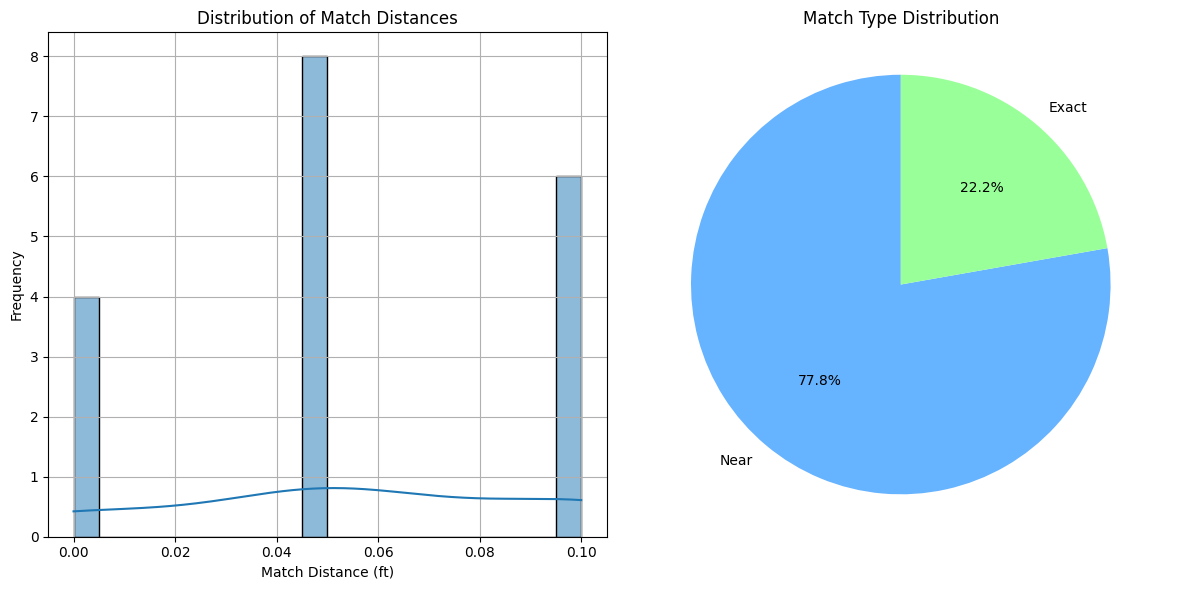

In [12]:
# Visualize the quality of matches
plt.figure(figsize=(12, 6))

# Left plot: Distance histogram
plt.subplot(1, 2, 1)
sns.histplot(joined['Distance'], bins=20, kde=True)
plt.xlabel('Match Distance (ft)')
plt.ylabel('Frequency')
plt.title('Distribution of Match Distances')
plt.grid(True)

# Right plot: Match types
plt.subplot(1, 2, 2)
match_counts = joined['Match_Type'].value_counts()
plt.pie(match_counts, labels=match_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#99ff99'], startangle=90)
plt.axis('equal')
plt.title('Match Type Distribution')

plt.tight_layout()
plt.savefig('match_quality.png', dpi=300, bbox_inches='tight')
plt.show()

17 lab variables
Lab variables: ['Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRD_Quartz', 'Lab_XRD_Plagioclase', 'Lab_XRD_Anhydrite', 'Lab_XRD_Pyrite', 'Lab_XRF_Na', 'Lab_XRF_Mg', 'Lab_XRF_Al', 'Lab_XRF_Si', 'Lab_XRF_P', 'Lab_XRF_S', 'Lab_XRF_Cl', 'Lab_XRF_K', 'Lab_XRF_Ca', 'Lab_XRF_Fe', 'Lab_XRF_Sr']
35 log variables


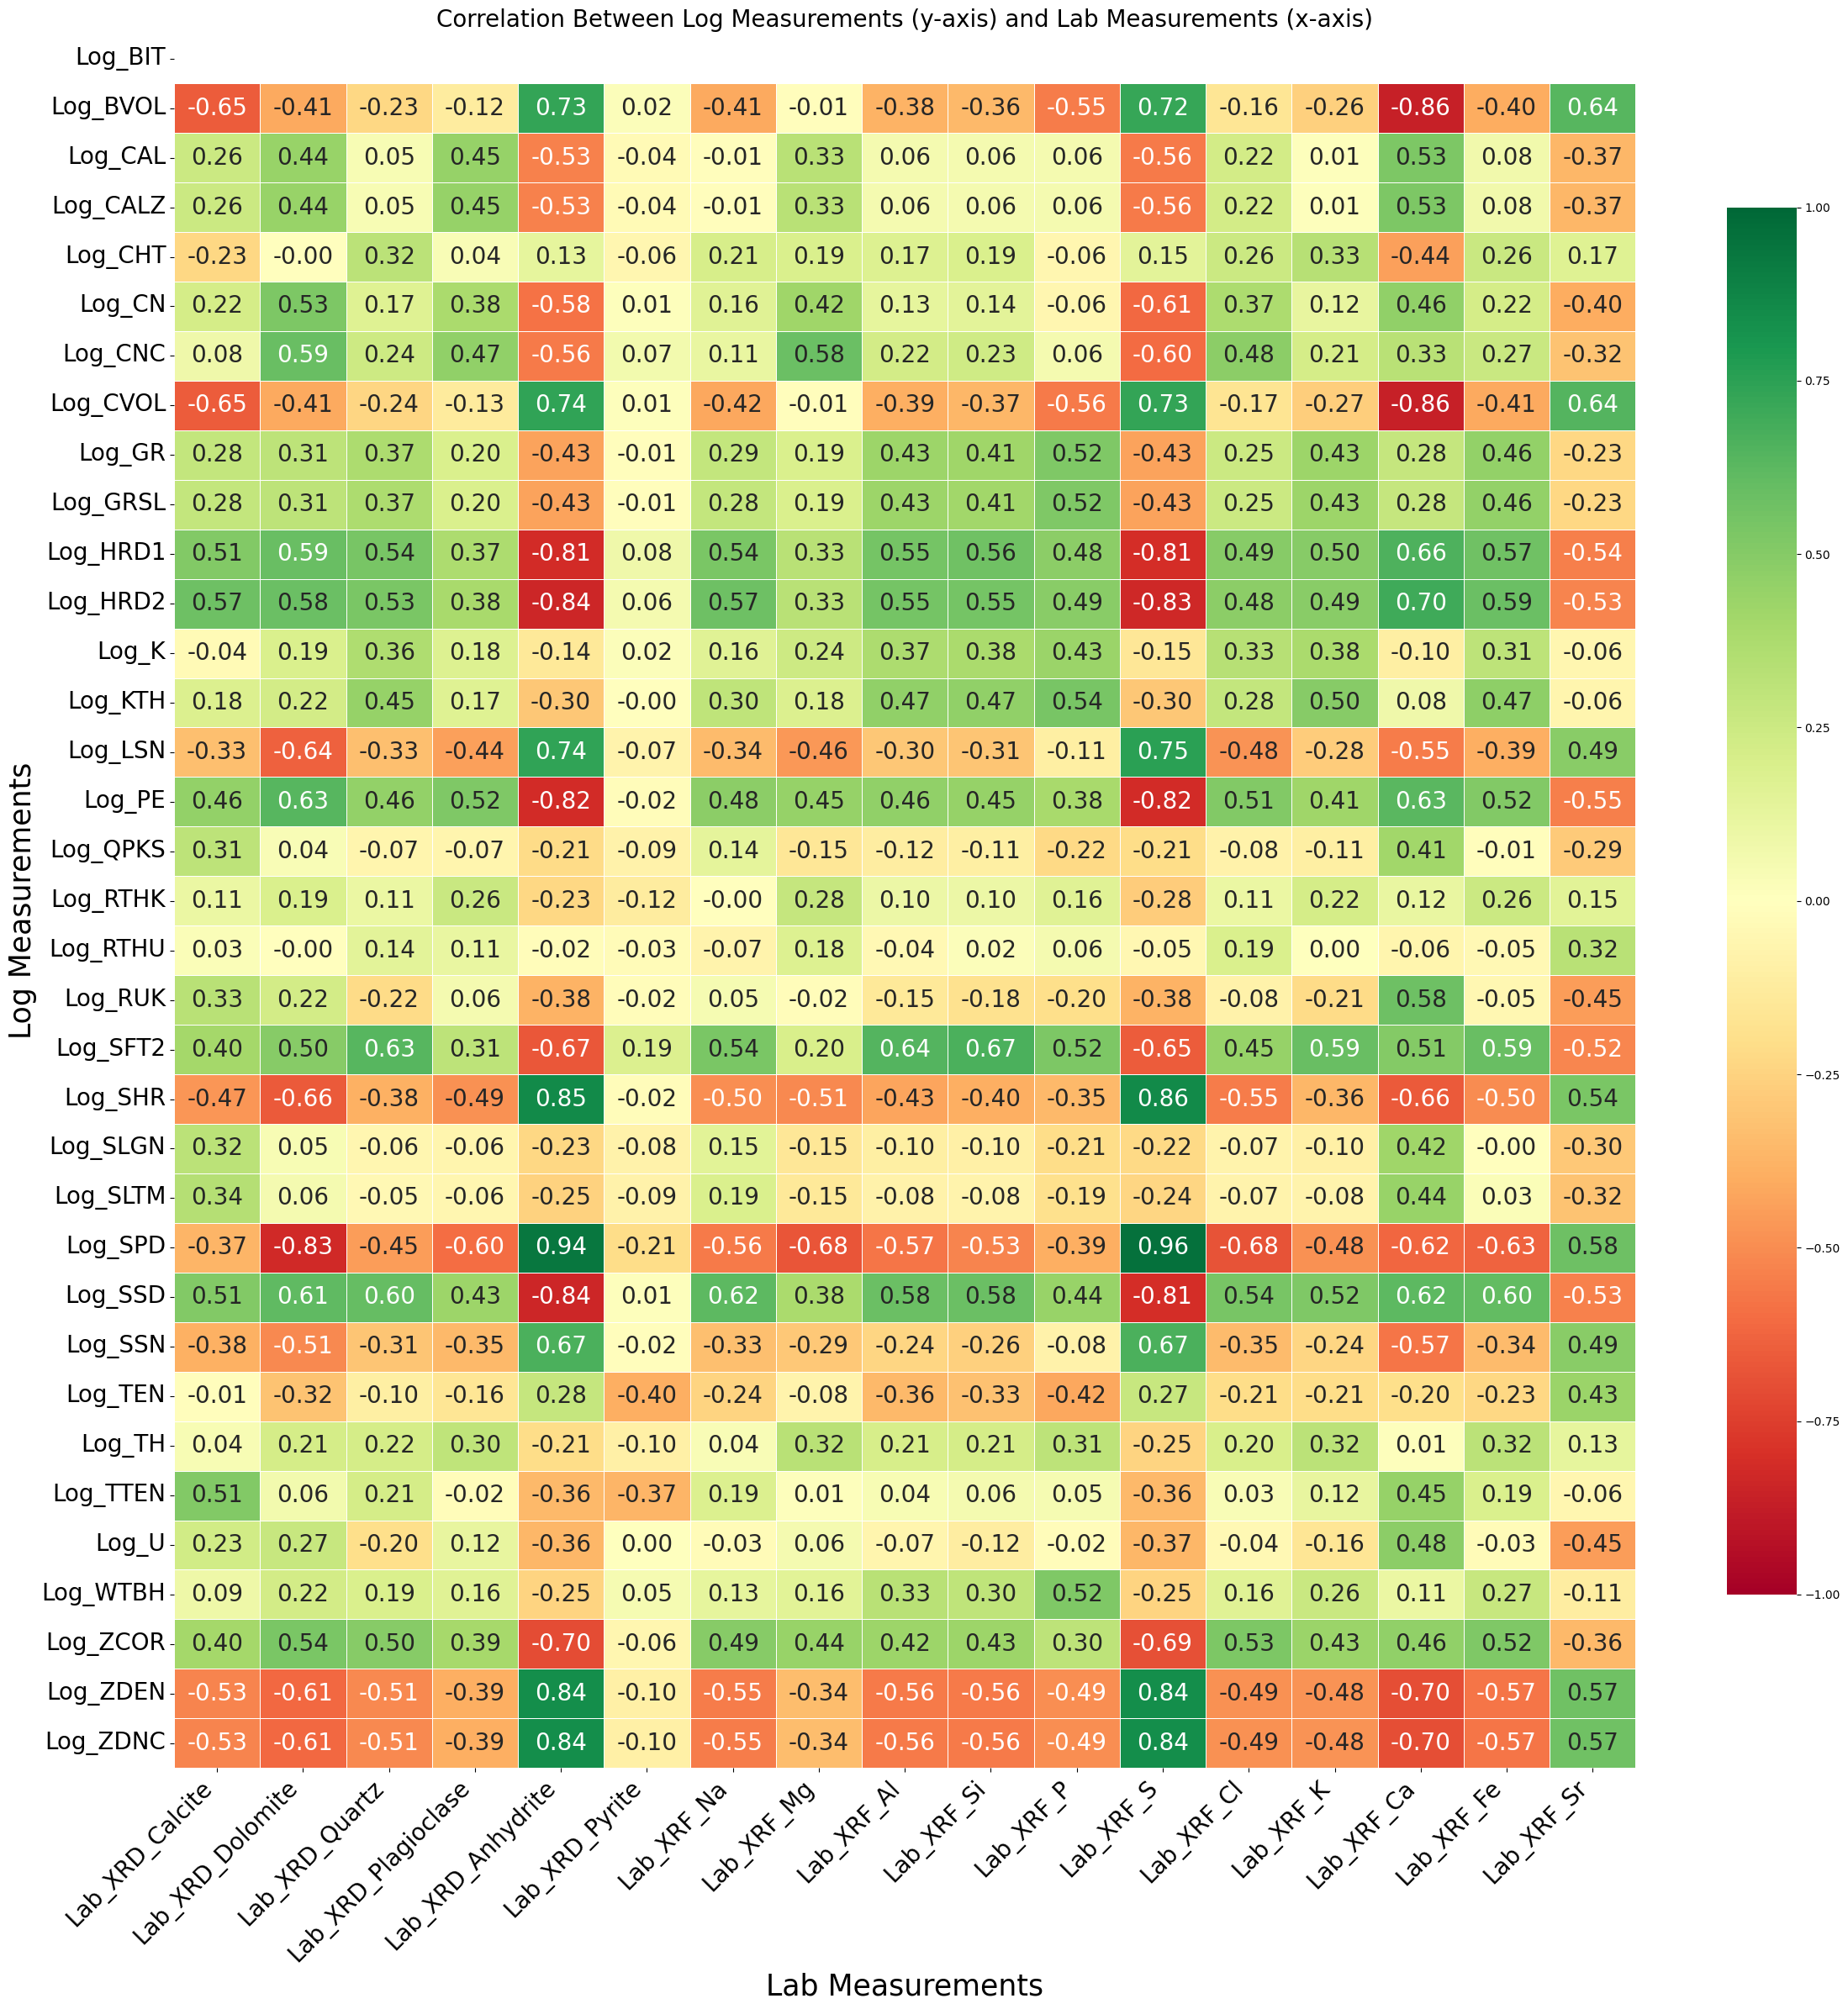

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter for all lab measurement columns (excluding non-measurement columns)
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and 
           col not in ['Lab_Depth', 'Lab_Sample_ID']]

# Filter for all log measurement columns (excluding non-measurement or auxiliary columns)
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# Filter out columns where all values are 0
lab_vars = [col for col in lab_vars if not (joined[col] == 0).all()]
log_vars = [col for col in log_vars if not ((joined[col] == 0).all() or joined[col].isna().all())]

# 31 - 10
print(len(lab_vars), "lab variables")
print("Lab variables:", lab_vars)
print(len(log_vars), "log variables")

# Compute correlation matrix (log variables as rows, lab variables as columns)
corr_matrix = joined[lab_vars + log_vars].corr().loc[log_vars, lab_vars]




# Create a larger figure for better readability
plt.figure(figsize=(24, 24))

# Plot the heatmap with rotated x-axis labels
sns.heatmap(corr_matrix, 
            annot=True,                  # Show correlation values
            cmap='RdYlGn',               # Use a diverging colormap
            vmin=-1, vmax=1,             # Fixed scale for correlation values
            linewidths=0.5,              # Add line separators
            fmt='.2f',                   # Format as 2 decimal places
            annot_kws={'size': 20},       # Smaller annotation font size
            cbar_kws={"shrink": 0.8})    # Adjust colorbar
            

#  labeling and styling
plt.title('Correlation Between Log Measurements (y-axis) and Lab Measurements (x-axis)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)      
plt.yticks(fontsize=20)                   
# Add clearer axis labels
plt.xlabel('Lab Measurements', fontsize=25, )
plt.ylabel('Log Measurements', fontsize=25, )

plt.tight_layout()
plt.savefig('HRDH_1119_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
#  IMPROVED CORRELATION ANALYSIS - Replacing repetitive code blocks
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

def enhanced_correlation_analysis(data, log_vars, lab_vars, significance_level=0.05):
    """Enhanced correlation with multiple statistics and significance testing"""
    
    # Initialize results dictionary
    results = {
        'pearson_r': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=float),
        'pearson_p': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=float),
        'spearman_r': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=float),
        'spearman_p': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=float),
        'n_samples': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=int)
    }
    
    print("🔬 ENHANCED CORRELATION ANALYSIS:")
    print("=" * 40)
    
    significant_correlations = []
    
    for log_var in log_vars:
        for lab_var in lab_vars:
            # Get clean data pairs
            clean_data = data[[log_var, lab_var]].dropna()
            n = len(clean_data)
            
            if n < 3:  # Need minimum 3 points for correlation
                continue
                
            try:
                # Calculate Pearson correlation
                pearson_r, pearson_p = pearsonr(clean_data[log_var], clean_data[lab_var])
                
                # Calculate Spearman correlation (rank-based, more robust)
                spearman_r, spearman_p = spearmanr(clean_data[log_var], clean_data[lab_var])
                
                # Store results
                results['pearson_r'].loc[log_var, lab_var] = pearson_r
                results['pearson_p'].loc[log_var, lab_var] = pearson_p
                results['spearman_r'].loc[log_var, lab_var] = spearman_r
                results['spearman_p'].loc[log_var, lab_var] = spearman_p
                results['n_samples'].loc[log_var, lab_var] = n
                
                # Check for statistical significance and strong correlation
                if pearson_p <= significance_level and abs(pearson_r) >= 0.6:
                    significant_correlations.append({
                        'log_var': log_var,
                        'lab_var': lab_var,
                        'pearson_r': pearson_r,
                        'pearson_p': pearson_p,
                        'spearman_r': spearman_r,
                        'n_samples': n
                    })
                    
            except Exception as e:
                print(f"⚠️  Error calculating correlation for {log_var} vs {lab_var}: {e}")
                continue
    
    # Display significant correlations
    print(f"\n🎯 SIGNIFICANT STRONG CORRELATIONS (|r| ≥ 0.6, p ≤ {significance_level}):")
    if significant_correlations:
        for corr in sorted(significant_correlations, key=lambda x: abs(x['pearson_r']), reverse=True):
            print(f"   • {corr['log_var']} ↔ {corr['lab_var']}: "
                  f"r={corr['pearson_r']:.3f} (p={corr['pearson_p']:.3f}, n={corr['n_samples']})")
    else:
        print("   ❌ No significant strong correlations found")
    
    # Summary statistics
    all_r = results['pearson_r'].values.flatten()
    all_r = all_r[~pd.isna(all_r)]
    
    print(f"\n📊 CORRELATION SUMMARY:")
    print(f"   • Total correlations calculated: {len(all_r)}")
    print(f"   • Mean |r|: {np.abs(all_r).mean():.3f}")
    print(f"   • Strong correlations (|r| ≥ 0.6): {(np.abs(all_r) >= 0.6).sum()}")
    print(f"   • Moderate correlations (0.3 ≤ |r| < 0.6): {((np.abs(all_r) >= 0.3) & (np.abs(all_r) < 0.6)).sum()}")
    
    return results

# Filter variables (fix the repetitive variable filtering)
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and 
           col not in ['Lab_Depth', 'Lab_Sample_ID']]
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# Remove zero-only columns
lab_vars = [col for col in lab_vars if not (joined[col] == 0).all()]
log_vars = [col for col in log_vars if not (joined[col] == 0).all()]

print(f"📋 Variables for analysis: {len(log_vars)} log vars, {len(lab_vars)} lab vars")

# Run enhanced correlation analysis
correlation_results = enhanced_correlation_analysis(joined, log_vars, lab_vars)

📋 Variables for analysis: 35 log vars, 17 lab vars
🔬 ENHANCED CORRELATION ANALYSIS:

🎯 SIGNIFICANT STRONG CORRELATIONS (|r| ≥ 0.6, p ≤ 0.05):
   • Log_SPD ↔ Lab_XRF_S: r=0.959 (p=0.000, n=17)
   • Log_SPD ↔ Lab_XRD_Anhydrite: r=0.936 (p=0.000, n=17)
   • Log_CVOL ↔ Lab_XRF_Ca: r=-0.863 (p=0.000, n=17)
   • Log_BVOL ↔ Lab_XRF_Ca: r=-0.863 (p=0.000, n=17)
   • Log_SHR ↔ Lab_XRF_S: r=0.859 (p=0.000, n=17)
   • Log_SHR ↔ Lab_XRD_Anhydrite: r=0.852 (p=0.000, n=17)
   • Log_ZDNC ↔ Lab_XRD_Anhydrite: r=0.842 (p=0.000, n=17)
   • Log_ZDEN ↔ Lab_XRD_Anhydrite: r=0.842 (p=0.000, n=17)
   • Log_HRD2 ↔ Lab_XRD_Anhydrite: r=-0.842 (p=0.000, n=17)
   • Log_ZDNC ↔ Lab_XRF_S: r=0.840 (p=0.000, n=17)
   • Log_ZDEN ↔ Lab_XRF_S: r=0.840 (p=0.000, n=17)
   • Log_SSD ↔ Lab_XRD_Anhydrite: r=-0.837 (p=0.000, n=17)
   • Log_HRD2 ↔ Lab_XRF_S: r=-0.832 (p=0.000, n=17)
   • Log_SPD ↔ Lab_XRD_Dolomite: r=-0.827 (p=0.000, n=17)
   • Log_PE ↔ Lab_XRD_Anhydrite: r=-0.820 (p=0.000, n=17)
   • Log_PE ↔ Lab_XRF_S: r=-0

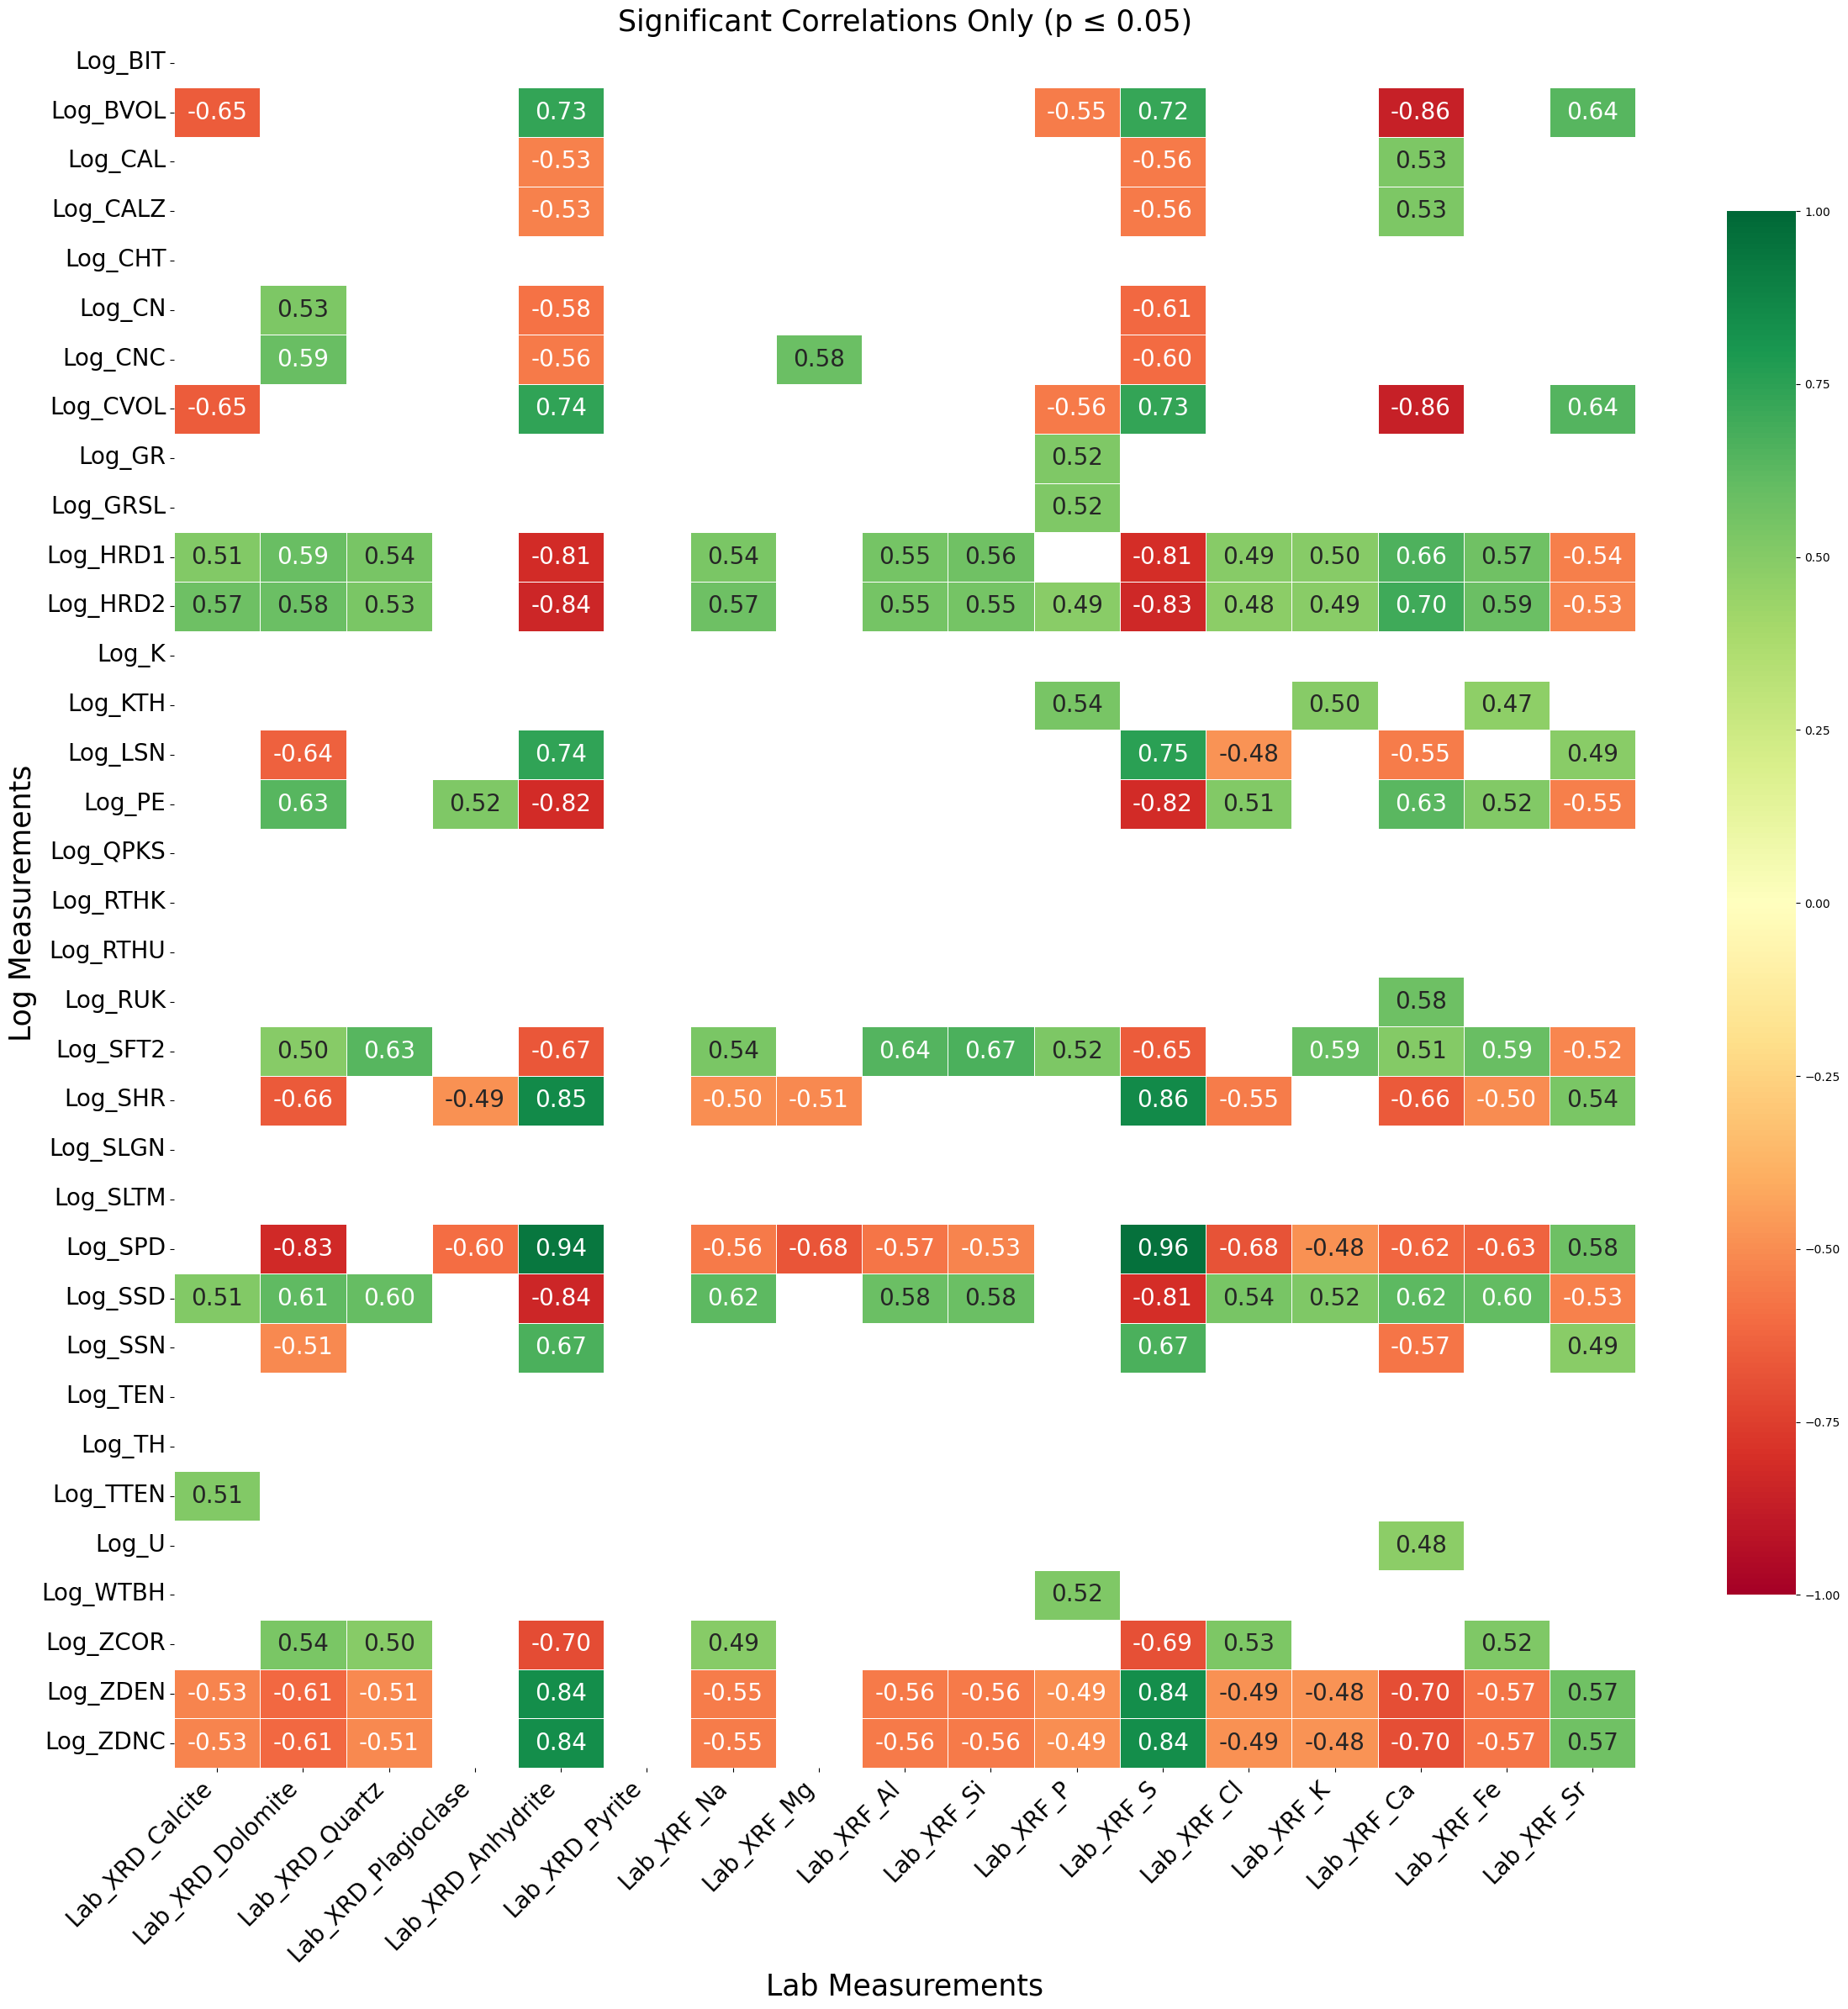


📊 CORRELATION HEATMAP SUMMARY:
   • Total correlations: 578
   • Significant correlations: 163
   • Significance rate: 28.2%

🎯 STRONGEST SIGNIFICANT CORRELATIONS:
   • Log_SPD ↔ Lab_XRF_S: r=0.959 (p=0.0000)
   • Log_SPD ↔ Lab_XRD_Anhydrite: r=0.936 (p=0.0000)
   • Log_CVOL ↔ Lab_XRF_Ca: r=-0.863 (p=0.0000)
   • Log_BVOL ↔ Lab_XRF_Ca: r=-0.863 (p=0.0000)
   • Log_SHR ↔ Lab_XRF_S: r=0.859 (p=0.0000)
   • Log_SHR ↔ Lab_XRD_Anhydrite: r=0.852 (p=0.0000)
   • Log_ZDNC ↔ Lab_XRD_Anhydrite: r=0.842 (p=0.0000)
   • Log_ZDEN ↔ Lab_XRD_Anhydrite: r=0.842 (p=0.0000)
   • Log_HRD2 ↔ Lab_XRD_Anhydrite: r=-0.842 (p=0.0000)
   • Log_ZDNC ↔ Lab_XRF_S: r=0.840 (p=0.0000)
   • Log_ZDEN ↔ Lab_XRF_S: r=0.840 (p=0.0000)
   • Log_SSD ↔ Lab_XRD_Anhydrite: r=-0.837 (p=0.0000)
   • Log_HRD2 ↔ Lab_XRF_S: r=-0.832 (p=0.0000)
   • Log_SPD ↔ Lab_XRD_Dolomite: r=-0.827 (p=0.0000)
   • Log_PE ↔ Lab_XRD_Anhydrite: r=-0.820 (p=0.0001)
   • Log_PE ↔ Lab_XRF_S: r=-0.819 (p=0.0001)
   • Log_HRD1 ↔ Lab_XRD_Anhydrite: r

In [15]:
# CORRELATION HEATMAP - Using enhanced correlation results
def create_enhanced_correlation_heatmap(correlation_results, significance_level=0.05):
    """Create correlation heatmap with significance masking"""
    
    # Get correlation matrix and p-values
    corr_matrix = correlation_results['pearson_r']
    p_matrix = correlation_results['pearson_p']
    n_matrix = correlation_results['n_samples']
    
    # Create significance mask
    significance_mask = (p_matrix > significance_level) | pd.isna(p_matrix)
    
    # Create figure with subplots
    fig, ax1 = plt.subplots(figsize=(24,24))
    
    
    # Right plot: Only significant correlations
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='RdYlGn', 
                vmin=-1, vmax=1,
                linewidths=0.5,
                fmt='.2f',
                annot_kws={'size': 20},
                mask=significance_mask,  # Mask non-significant
                ax=ax1,
                cbar_kws={"shrink": 0.8})
    ax1.set_title(f'Significant Correlations Only (p ≤ {significance_level})', fontsize=25)
    ax1.set_xlabel('Lab Measurements', fontsize=25)
    ax1.set_ylabel('Log Measurements', fontsize=25)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=20)

    # Fix axis tick label formatting
    for ax in [ax1]:
        plt.sca(ax)
        plt.xticks(rotation=45, ha='right', fontsize=20)
        plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.savefig('enhanced_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    # Print summary of significant correlations
    significant_count = (~significance_mask).sum().sum()
    total_count = (~pd.isna(corr_matrix)).sum().sum()
    
    print(f"\n📊 CORRELATION HEATMAP SUMMARY:")
    print(f"   • Total correlations: {total_count}")
    print(f"   • Significant correlations: {significant_count}")
    print(f"   • Significance rate: {(significant_count/total_count)*100:.1f}%")
    
    # Find and display strongest correlations
    strong_correlations = []
    for i in corr_matrix.index:
        for j in corr_matrix.columns:
            r = corr_matrix.loc[i, j]
            p = p_matrix.loc[i, j]
            if not pd.isna(r) and not pd.isna(p) and abs(r) >= 0.6 and p <= significance_level:
                strong_correlations.append((i, j, r, p))
    
    if strong_correlations:
        print(f"\n🎯 STRONGEST SIGNIFICANT CORRELATIONS:")
        for log_var, lab_var, r, p in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
            print(f"   • {log_var} ↔ {lab_var}: r={r:.3f} (p={p:.4f})")
    else:
        print(f"\n❌ No strong significant correlations found (|r| ≥ 0.6, p ≤ {significance_level})")

# Create enhanced correlation heatmap if we have results
if 'correlation_results' in locals():
    create_enhanced_correlation_heatmap(correlation_results)

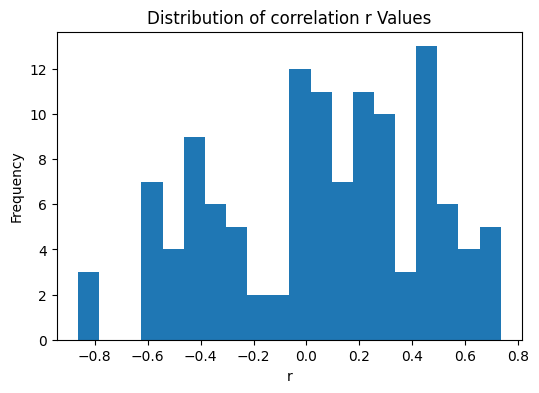

In [16]:
# Extract all unique r’s
vals = corr_matrix.values
mask = np.triu(np.ones_like(vals), k=1).astype(bool)
r_vals = vals[mask]

plt.figure(figsize=(6,4))
plt.hist(r_vals, bins=20)
plt.title("Distribution of correlation r Values")
plt.xlabel("r")
plt.ylabel("Frequency")
plt.show()


# stat

In [17]:
# ► 1a) Compute summary stats
stats = joined[log_vars + lab_vars].describe().T
stats['skew']    = joined[stats.index].skew()
stats['kurtosis']= joined[stats.index].kurtosis()

# ► 1b) Display top 10 for review
stats[['mean','50%','std','min','max','skew','kurtosis']]

,mean,50%,std,min,max,skew,kurtosis
Log_BIT,12.000000,12.000000,0.000000,12.000000,12.000000,0.000000,0.000000
Log_BVOL,472.316040,484.015900,41.091106,378.696991,510.849945,-1.384236,1.355757
Log_CAL,13.816551,13.673468,0.387304,13.411035,14.660528,1.077253,0.648082
Log_CALZ,13.816551,13.673468,0.387304,13.411035,14.660528,1.077253,0.648082
Log_CHT,1044.773193,1049.840332,24.732845,979.364014,1080.333252,-1.453427,2.535282
...,...,...,...,...,...,...,...
Lab_XRF_Cl,0.093333,0.080000,0.072193,0.000000,0.280000,0.894077,1.161649
Lab_XRF_K,0.403889,0.245000,0.442960,0.000000,1.520000,2.018999,3.160637
Lab_XRF_Ca,77.270556,74.475000,8.586508,68.280000,92.930000,0.993847,-0.473775
Lab_XRF_Fe,0.617778,0.470000,0.482561,0.090000,1.900000,1.570546,2.220706


#  ANALYSIS


In [18]:
#  DATA VALIDATION 
def validate_petrophysical_data(log_df, lab_data):
    """Validate data quality from petrophysics perspective"""
    issues = []
    
    print("🔍 PETROPHYSICAL DATA VALIDATION:")
    print("=" * 40)
    
    # 1. Check for unrealistic log values
    if 'Log_GR' in log_df.columns:
        gr_issues = (log_df['Log_GR'] < 0) | (log_df['Log_GR'] > 500)
        if gr_issues.any():
            issues.append(f"GR values outside normal range: {gr_issues.sum()} samples")
            print(f"⚠️  GR range issues: {gr_issues.sum()} samples outside 0-500 API")
        else:
            print(f"✅ GR values: Normal range (0-500 API)")
    
    # 2. Check density values
    if 'Log_ZDEN' in log_df.columns:
        den_issues = (log_df['Log_ZDEN'] < 1.5) | (log_df['Log_ZDEN'] > 3.5)
        if den_issues.any():
            issues.append(f"Density values outside normal range: {den_issues.sum()} samples")
            print(f"⚠️  Density range issues: {den_issues.sum()} samples outside 1.5-3.5 g/cc")
        else:
            print(f"✅ Density values: Normal range (1.5-3.5 g/cc)")
    
    # 3. Validate XRD mineralogy totals
    xrd_cols = [col for col in lab_data.columns if 'XRD' in col]
    if xrd_cols:
        totals = lab_data[xrd_cols].sum(axis=1)
        problematic = (totals > 105) | (totals < 95)
        if problematic.any():
            issues.append(f"XRD mineral totals outside 95-105%: {problematic.sum()} samples")
            print(f"⚠️  XRD closure issues: {problematic.sum()} samples outside 95-105%")
        else:
            print(f"✅ XRD mineral totals: Good closure (95-105%)")
    
    # 4. Check for negative values in percentages
    percentage_cols = [col for col in lab_data.columns if any(x in col for x in ['XRD', 'XRF'])]
    for col in percentage_cols:
        if (lab_data[col] < 0).any():
            issues.append(f"Negative values in {col}")
            print(f"⚠️  Negative values found in {col}")
    
    print(f"\n📋 VALIDATION SUMMARY:")
    if not issues:
        print("✅ All validation checks passed!")
    else:
        print(f"❌ Found {len(issues)} data quality issues:")
        for issue in issues:
            print(f"   • {issue}")
    
    return issues

# Run validation
validation_issues = validate_petrophysical_data(log_df_clean, lab_data)

🔍 PETROPHYSICAL DATA VALIDATION:
✅ XRD mineral totals: Good closure (95-105%)

📋 VALIDATION SUMMARY:
✅ All validation checks passed!


📊 Creating efficient distribution visualizations...


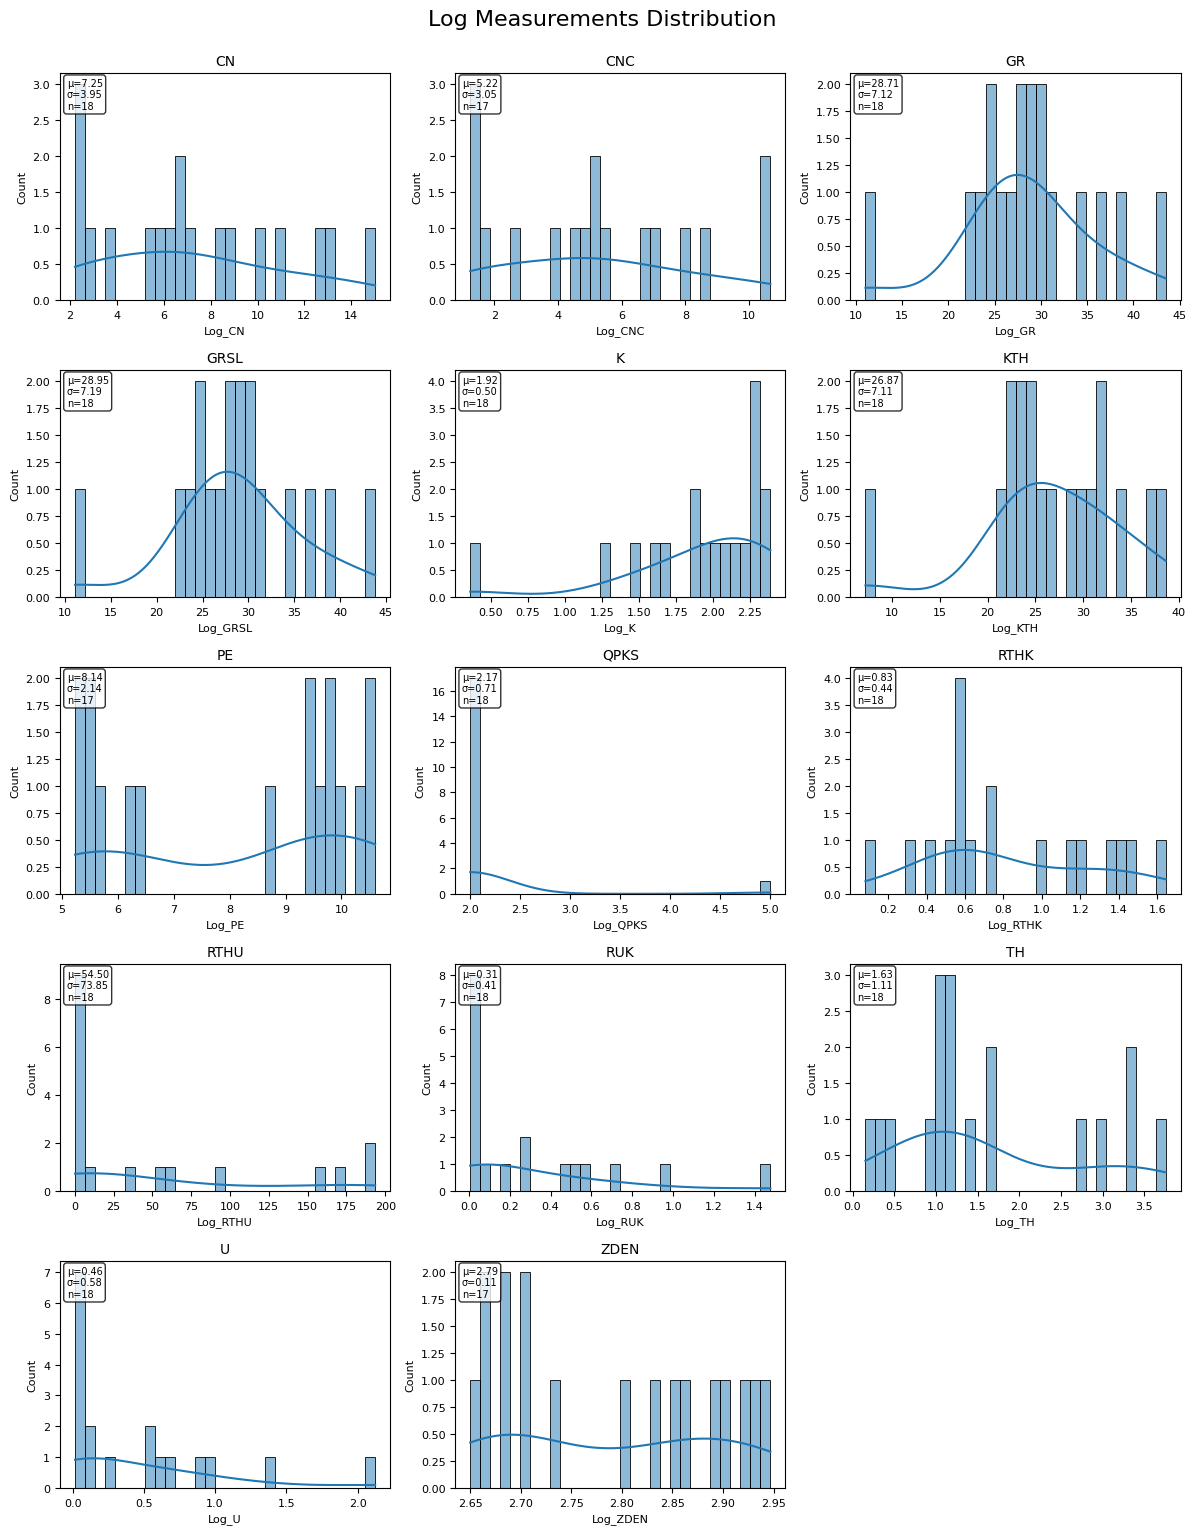

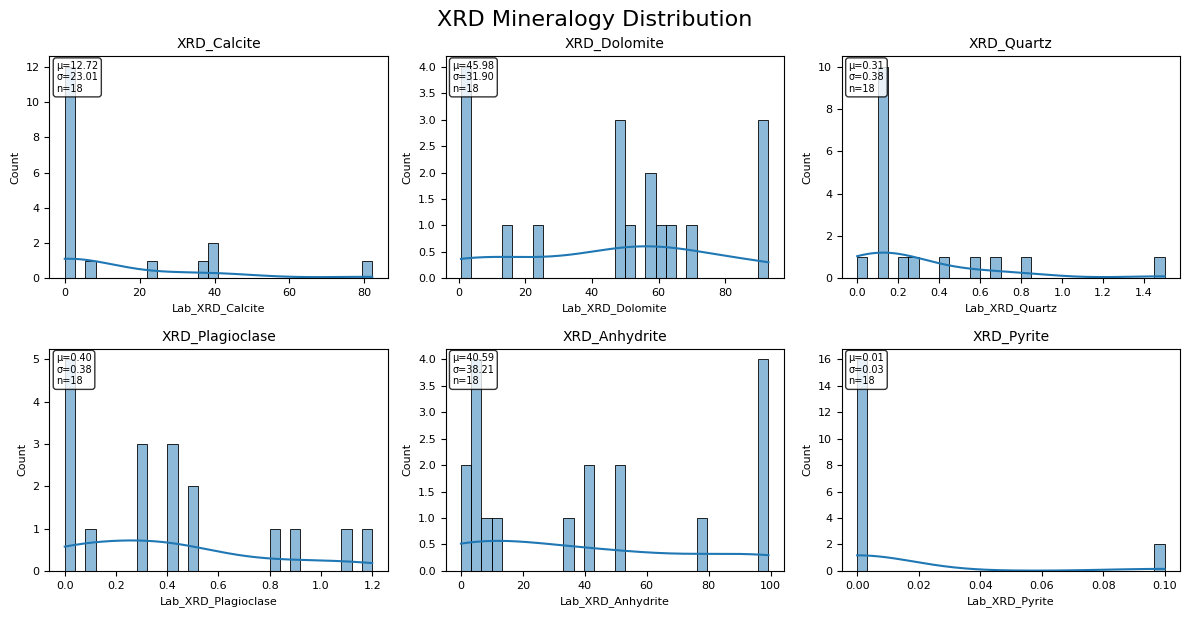

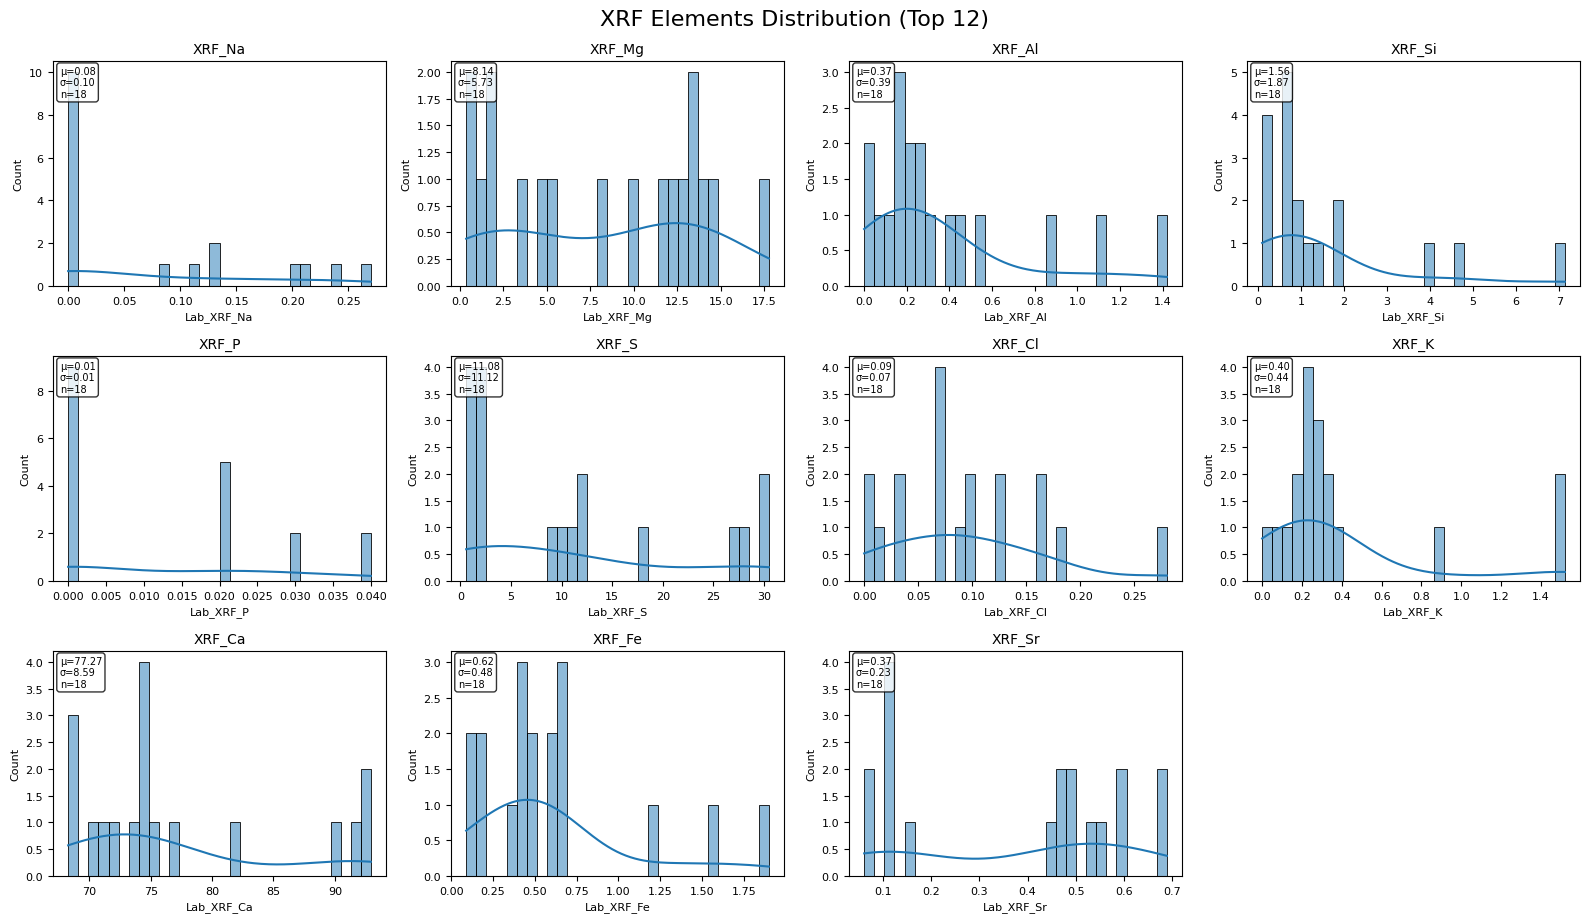

✅ Efficient visualizations completed and saved!


In [19]:
#  VISUALIZATIONS - Efficient grid plots instead of individual loops
def create_distribution_grid(data, variables, ncols=4, figsize_per_plot=(4, 3)):
    """Create efficient grid of distribution plots instead of individual loops"""
    
    n_vars = len(variables)
    nrows = (n_vars + ncols - 1) // ncols
    
    fig, axes = plt.subplots(nrows, ncols, 
                            figsize=(figsize_per_plot[0] * ncols, figsize_per_plot[1] * nrows))
    
    # Handle single row case
    if nrows == 1:
        axes = [axes] if ncols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(variables):
        if i < len(axes):
            # Clean data and create histogram
            clean_data = data[var].dropna()
            
            if len(clean_data) > 0:
                sns.histplot(clean_data, bins=30, kde=True, ax=axes[i])
                axes[i].set_title(f"{var.replace('Lab_', '').replace('Log_', '')}", fontsize=10)
                axes[i].set_xlabel(var, fontsize=8)
                axes[i].set_ylabel("Count", fontsize=8)
                axes[i].tick_params(labelsize=8)
                
                # Add statistics text
                axes[i].text(0.02, 0.98, 
                           f'μ={clean_data.mean():.2f}\nσ={clean_data.std():.2f}\nn={len(clean_data)}',
                           transform=axes[i].transAxes, fontsize=7, 
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            else:
                axes[i].text(0.5, 0.5, 'No Data', transform=axes[i].transAxes, 
                           ha='center', va='center', fontsize=12)
                axes[i].set_title(f"{var} (No Data)")
    
    # Hide empty subplots
    for i in range(n_vars, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    return fig

# Create efficient distribution plots
print("📊 Creating efficient distribution visualizations...")

# Split variables into logical groups for better visualization
log_measurement_vars = [v for v in log_vars if any(x in v for x in ['GR', 'ZDEN', 'CN', 'PE', 'U', 'TH', 'K'])]
lab_xrd_vars = [v for v in lab_vars if 'XRD' in v]
lab_xrf_vars = [v for v in lab_vars if 'XRF' in v]

# Create grouped visualizations
if log_measurement_vars:
    fig1 = create_distribution_grid(joined, log_measurement_vars, ncols=3)
    fig1.suptitle("Log Measurements Distribution", fontsize=16, y=1.02)
    plt.savefig('log_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

if lab_xrd_vars:
    fig2 = create_distribution_grid(joined, lab_xrd_vars, ncols=3)
    fig2.suptitle("XRD Mineralogy Distribution", fontsize=16, y=1.02)
    plt.savefig('xrd_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

if lab_xrf_vars:
    fig3 = create_distribution_grid(joined, lab_xrf_vars[:12], ncols=4)  # Limit to first 12 for readability
    fig3.suptitle("XRF Elements Distribution (Top 12)", fontsize=16, y=1.02)
    plt.savefig('xrf_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

print("✅ Efficient visualizations completed and saved!")


📊 CREATING MINERAL COMPOSITION CHART...


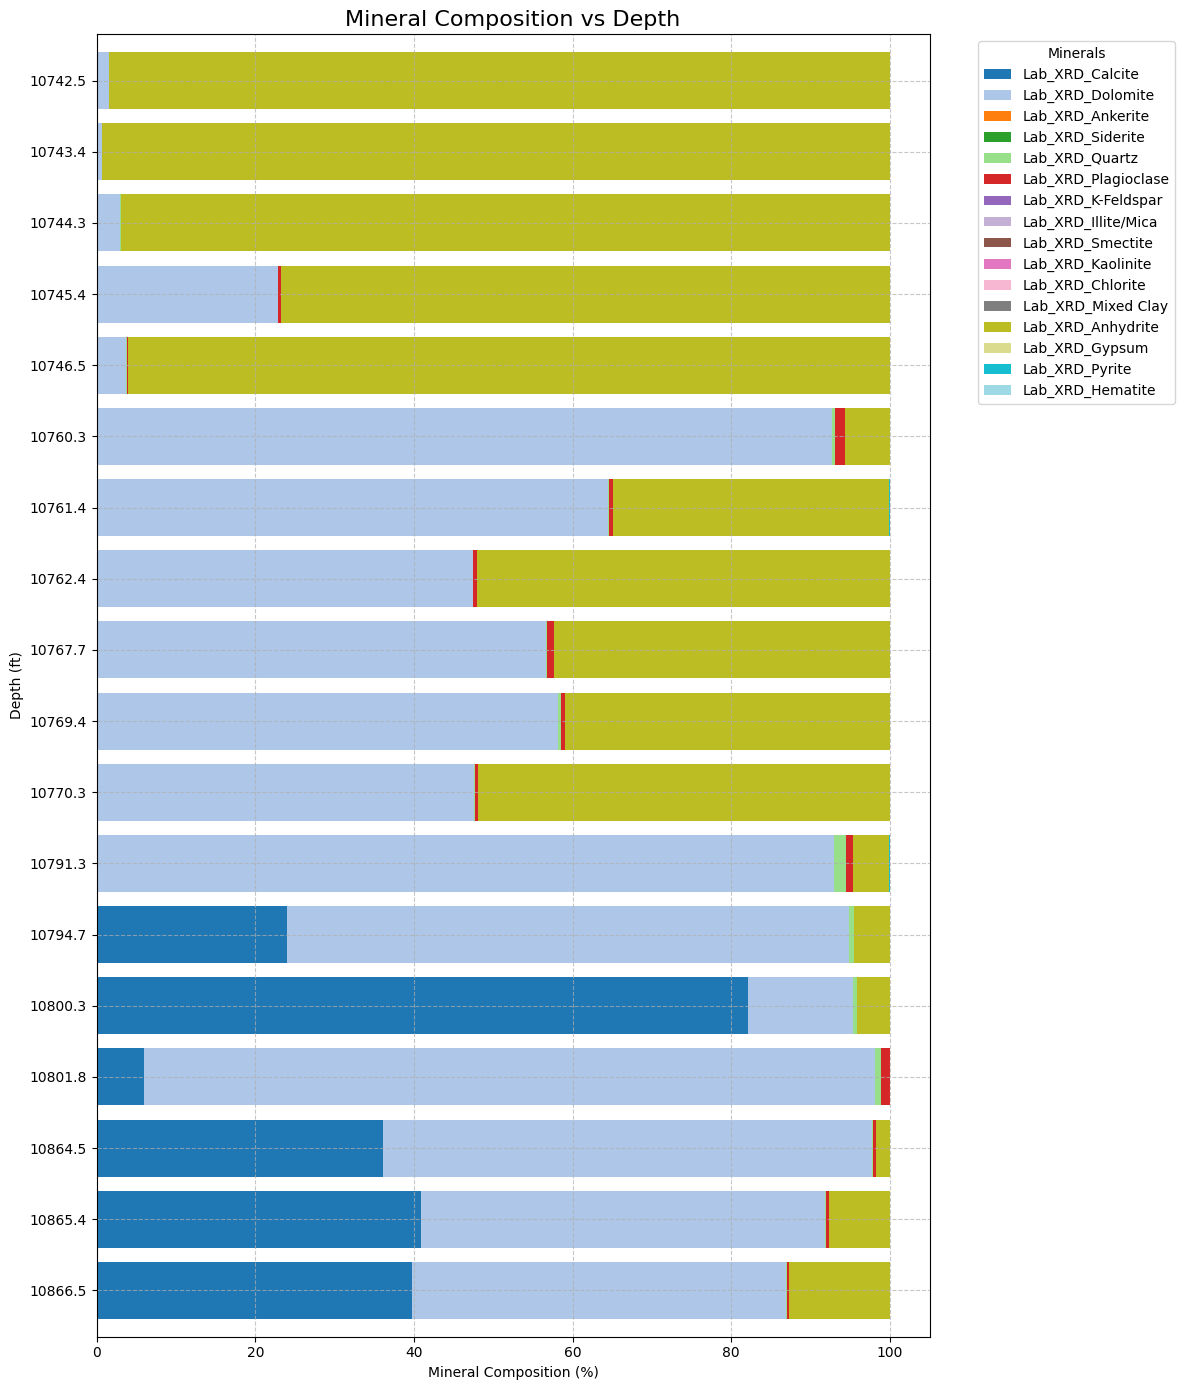


📊 CREATING LOG VS MINERAL SCATTERPLOTS...


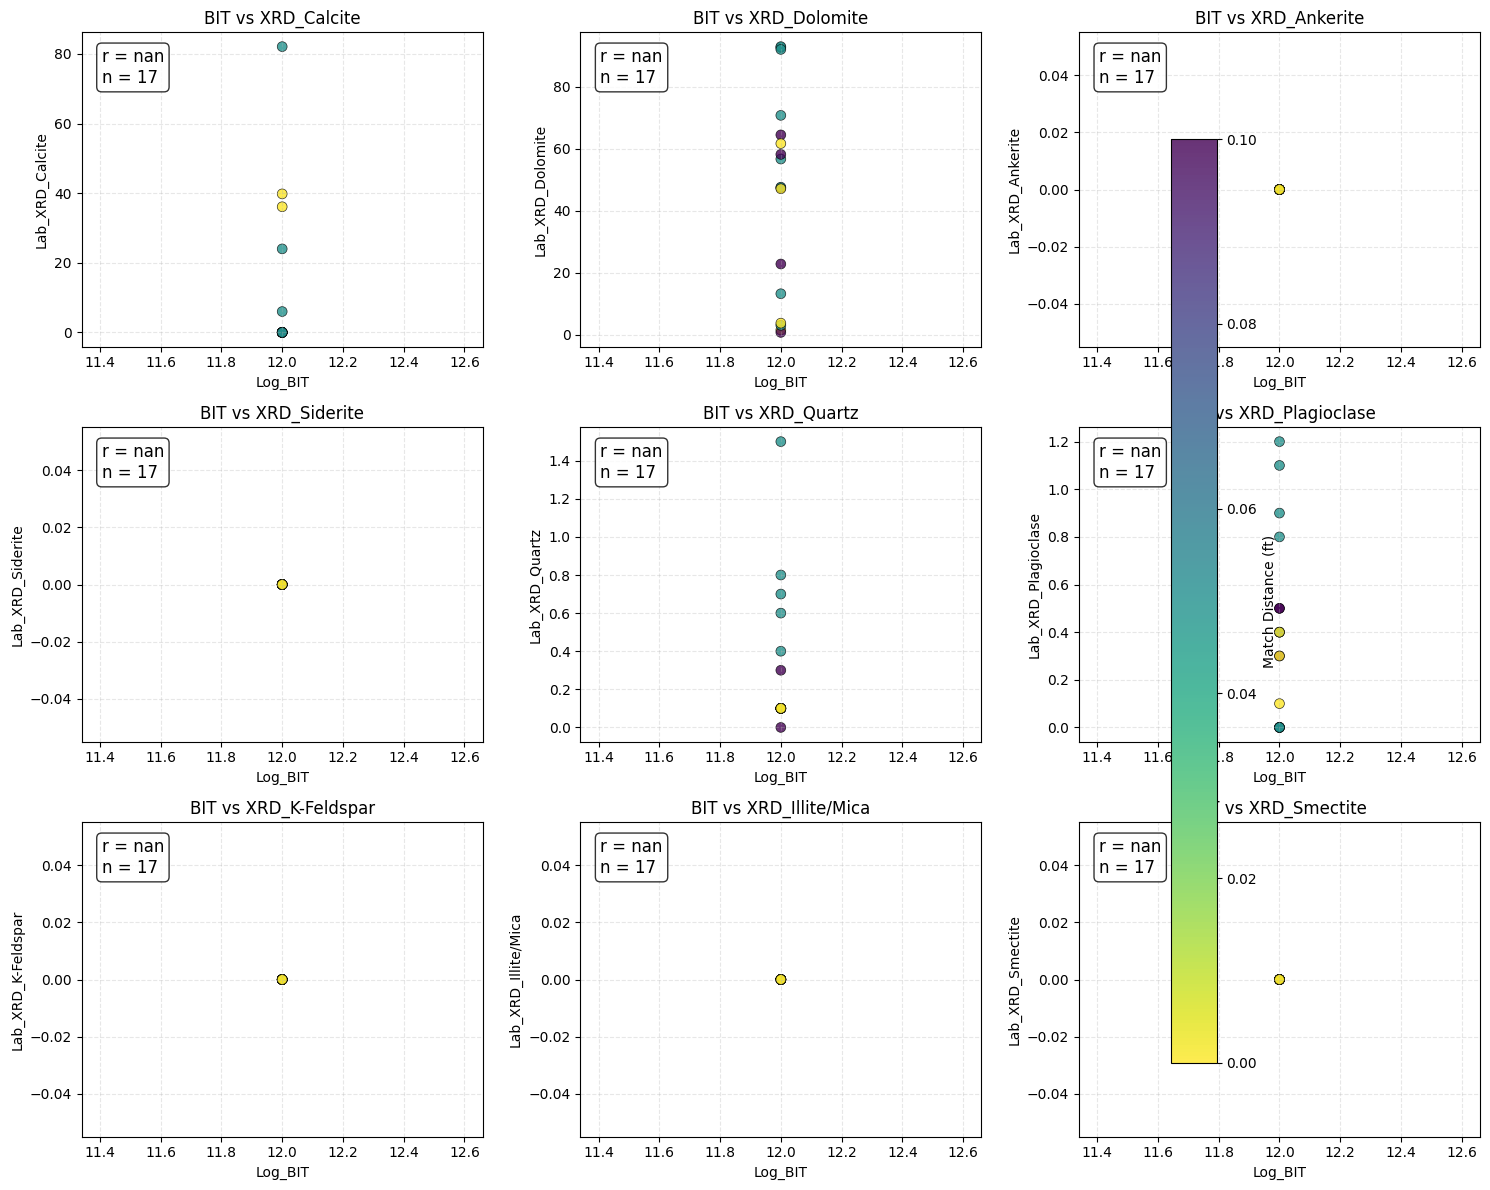


📊 CREATING DEPTH TREND PLOTS...


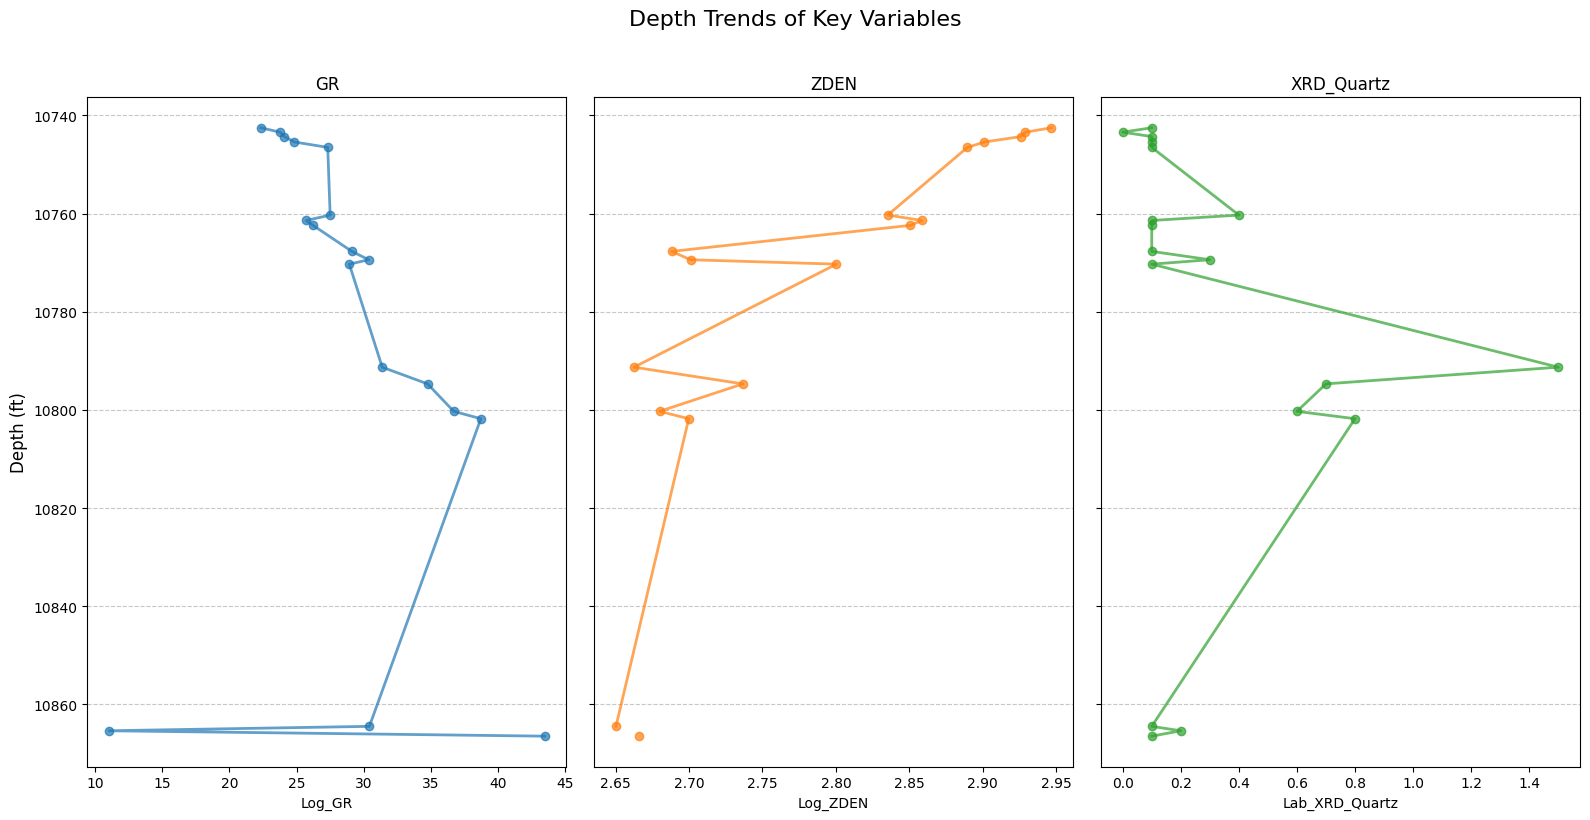


📊 CREATING MINERAL PAIRPLOTS...


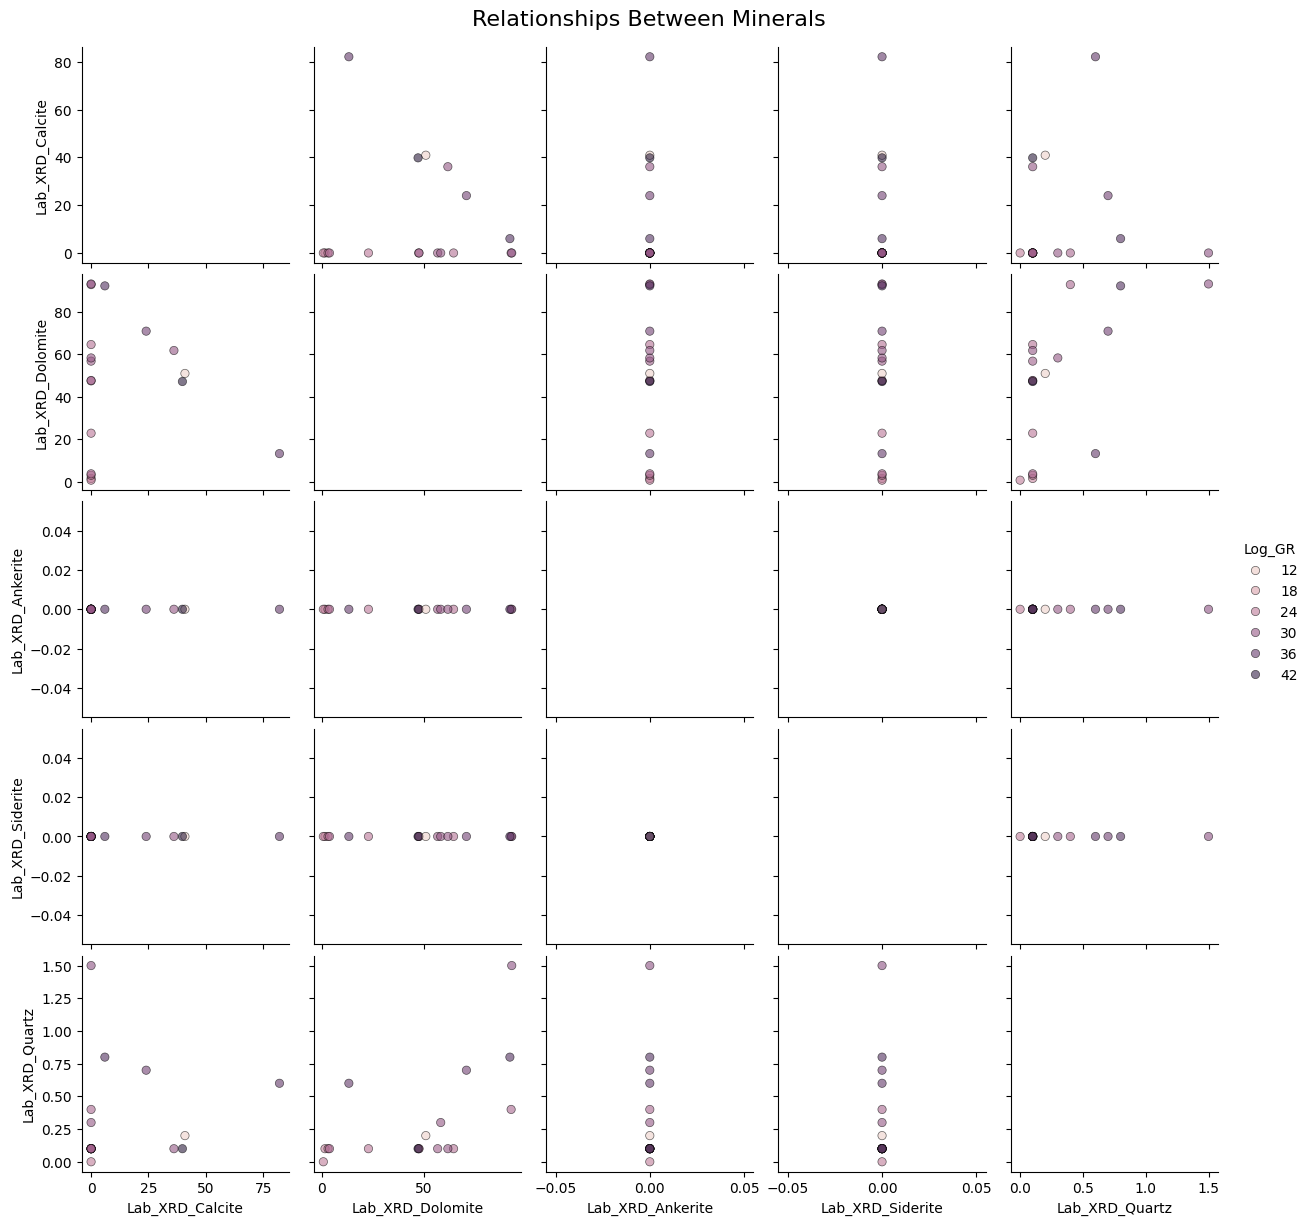


📊 CREATING COMPOSITE LOG PLOT...


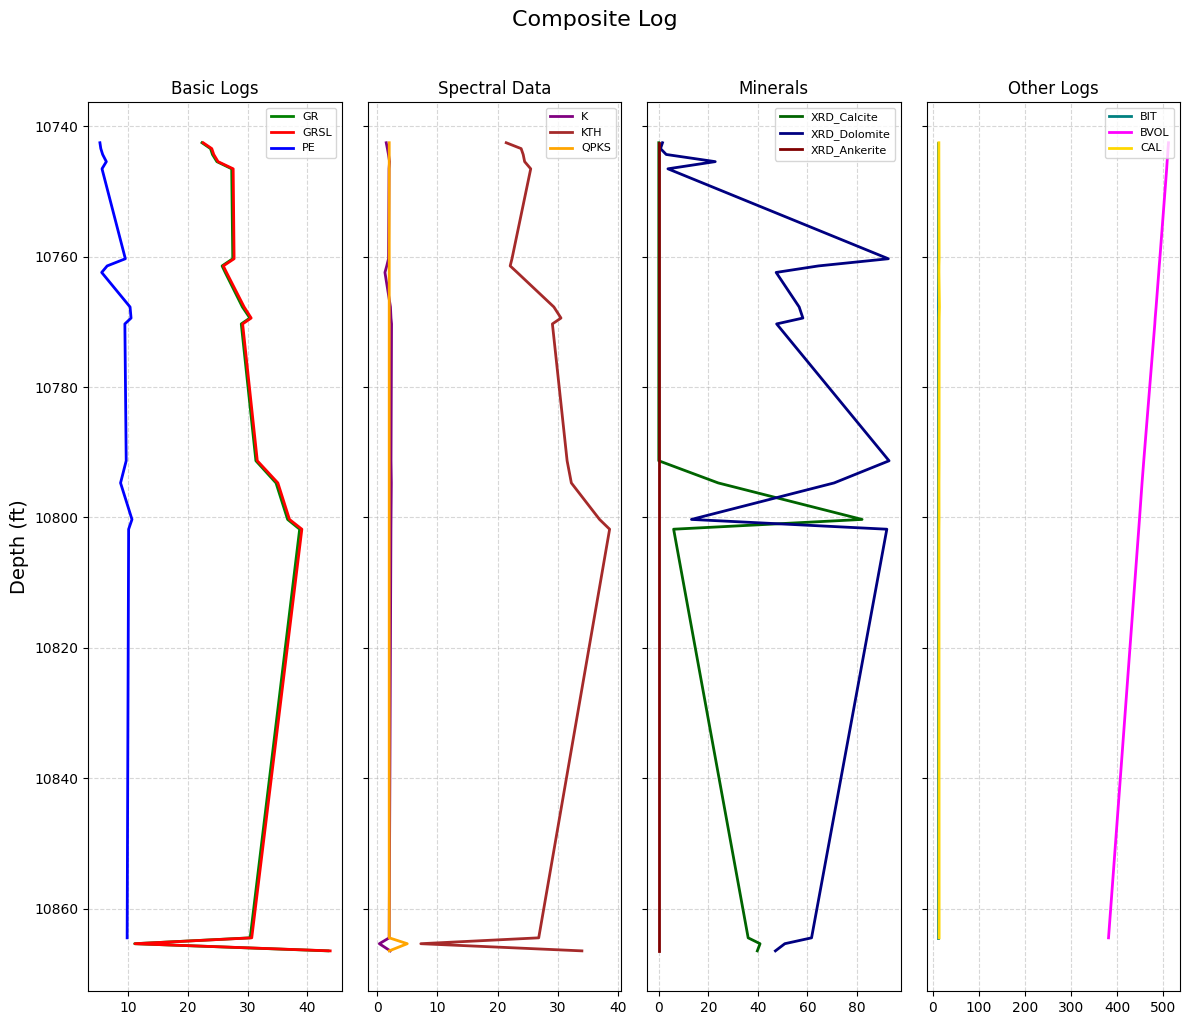


✅ ALL VISUALIZATIONS CREATED AND SAVED!


In [20]:
# ADVANCED VISUALIZATIONS - Scatter Plots for Log vs Lab Data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def create_mineral_composition_bar(data, mineral_columns):
    """Create stacked bar chart of mineral composition by depth"""
    
    # Sort by depth for proper stratigraphic order (deepest at bottom)
    plot_data = data.sort_values('Lab_Depth', ascending=False)
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=(12, 14))
    
    # Filter to only include specified mineral columns and ensure they sum to 100%
    minerals_data = plot_data[mineral_columns].copy()
    
    # Normalize each row to sum to 100%
    row_sums = minerals_data.sum(axis=1)
    normalized_data = minerals_data.div(row_sums, axis=0) * 100
    
    # Create stacked horizontal bar chart
    normalized_data.plot(kind='barh', stacked=True, ax=ax, width=0.8,
                         colormap='tab20')
    
    # Add depth labels on y-axis
    ax.set_yticks(range(len(plot_data)))
    ax.set_yticklabels([f"{d:.1f}" for d in plot_data['Lab_Depth']])
    
    # Customize plot
    ax.set_xlabel('Mineral Composition (%)')
    ax.set_ylabel('Depth (ft)')
    ax.set_title('Mineral Composition vs Depth', fontsize=16)
    plt.legend(title='Minerals', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('mineral_composition_vs_depth.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def create_log_vs_mineral_scatterplots(data, log_vars, mineral_vars, n_cols=3):
    """Create a grid of scatterplots comparing log measurements to mineral content"""
    
    # Find all combinations with correlation coefficients
    correlations = []
    for log_var in log_vars:
        for mineral_var in mineral_vars:
            if log_var in data.columns and mineral_var in data.columns:
                valid_data = data[[log_var, mineral_var]].dropna()
                if len(valid_data) >= 5:  # Need at least 5 points for meaningful correlation
                    corr = valid_data.corr().iloc[0, 1]
                    correlations.append((log_var, mineral_var, corr, len(valid_data)))
    
    # Sort by absolute correlation (strongest first)
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Select top correlations (up to 9 plots)
    top_correlations = correlations[:9]
    
    if not top_correlations:
        print("❌ No valid correlations found with sufficient data points")
        return None
    
    # Determine grid size
    n_plots = len(top_correlations)
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    # Create scatterplots
    for i, (log_var, mineral_var, corr, n) in enumerate(top_correlations):
        if i < len(axes):
            # Clean and prepare data
            plot_data = data[[log_var, mineral_var, 'Distance']].dropna()
            
            # Color by match distance quality
            scatter = axes[i].scatter(plot_data[log_var], plot_data[mineral_var], 
                          c=plot_data['Distance'], cmap='viridis_r',
                          alpha=0.8, s=50, edgecolor='k', linewidth=0.5)
            
            # Add trend line
            sns.regplot(x=log_var, y=mineral_var, data=plot_data, 
                        scatter=False, ax=axes[i], color='red', line_kws={'linewidth': 2})
            
            # Add correlation text
            axes[i].text(0.05, 0.95, f'r = {corr:.2f}\nn = {n}', 
                      transform=axes[i].transAxes, fontsize=12,
                      verticalalignment='top', 
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Customize plot
            axes[i].set_title(f'{log_var.replace("Log_", "")} vs {mineral_var.replace("Lab_", "")}')
            axes[i].set_xlabel(log_var)
            axes[i].set_ylabel(mineral_var)
            axes[i].grid(True, linestyle='--', alpha=0.3)
    
    # Hide unused subplots
    for i in range(n_plots, len(axes)):
        axes[i].set_visible(False)
    
    # Add colorbar for match distance
    if n_plots > 0:
        cbar = fig.colorbar(scatter, ax=axes, pad=0.01)
        cbar.set_label('Match Distance (ft)')
    
    plt.tight_layout()
    plt.savefig('log_vs_mineral_scatterplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def create_depth_trend_plots(data, variables, n_cols=3):
    """Create depth trend plots for selected variables"""
    
    n_vars = len(variables)
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(1, n_cols, figsize=(16, 8), sharey=True)
    if n_cols == 1:
        axes = [axes]
    
    # Sort by depth for proper stratigraphic order (deepest at bottom)
    plot_data = data.sort_values('Lab_Depth')
    
    # Common y-axis (depth)
    depth = plot_data['Lab_Depth']
    
    # Color palette
    colors = plt.cm.tab10.colors
    
    for i, var in enumerate(variables[:n_cols]):
        if var in plot_data.columns:
            # Get clean data
            var_data = plot_data[var].values
            
            # Create line plot
            axes[i].plot(var_data, depth, 'o-', color=colors[i % len(colors)], 
                        markersize=6, linewidth=2, alpha=0.7)
            
            # Add horizontal grid lines
            axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
            
            # Add labels
            axes[i].set_title(var.replace('Lab_', '').replace('Log_', ''), fontsize=12)
            axes[i].set_xlabel(var, fontsize=10)
            
            # Invert y-axis for depth (top at top)
            axes[i].invert_yaxis()
    
    # Set common y label only on leftmost plot
    axes[0].set_ylabel('Depth (ft)', fontsize=12)
    
    # Add main title
    fig.suptitle('Depth Trends of Key Variables', fontsize=16, y=1.02)
    
    plt.tight_layout()
    plt.savefig('depth_trend_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def create_mineral_pairplots(data, mineral_vars, color_var=None):
    """Create pairplots for mineral relationships with optional coloring"""
    
    # Subset data to selected variables
    plot_data = data[mineral_vars].copy()
    
    # Add a color variable if specified
    if color_var and color_var in data.columns:
        plot_data[color_var] = data[color_var]
        
        # Create pairplot with coloring
        g = sns.pairplot(plot_data, diag_kind='kde', 
                         plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5},
                         hue=color_var)
    else:
        # Create pairplot without coloring
        g = sns.pairplot(plot_data, diag_kind='kde', 
                         plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5})
    
    # Adjust title and layout
    plt.subplots_adjust(top=0.95)
    g.fig.suptitle('Relationships Between Minerals', fontsize=16)
    
    plt.savefig('mineral_pairplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return g

def create_composite_log_plot(data, log_vars, label_cols=None):
    """Create a composite log plot with multiple tracks"""
    
    # Sort by depth
    plot_data = data.sort_values('Lab_Depth')
    
    # Set up tracks (columns of plots)
    n_tracks = min(4, len(log_vars) // 2 + 1)  # At most 4 tracks
    
    # Create figure
    fig, axes = plt.subplots(1, n_tracks, figsize=(3*n_tracks, 10), sharey=True)
    if n_tracks == 1:
        axes = [axes]
    
    # Depth data
    depth = plot_data['Lab_Depth']
    
    # Customize each track
    # Track 1: Basic measurements (GR, density)
    basic_logs = [var for var in log_vars if any(x in var for x in ['GR', 'ZDEN', 'PE'])]
    if basic_logs and len(basic_logs) > 0:
        ax = axes[0]
        
        # Multiple curves on same track with different colors
        for i, log in enumerate(basic_logs[:3]):  # Limit to 3 curves per track
            if log in plot_data.columns:
                color = ['green', 'red', 'blue'][i % 3]
                ax.plot(plot_data[log], depth, label=log.replace('Log_', ''), 
                       color=color, linewidth=2)
        
        ax.set_title('Basic Logs', fontsize=12)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.invert_yaxis()  # Depth increases downward
    
    # Track 2: Spectral data
    spectral_logs = [var for var in log_vars if any(x in var for x in ['K', 'U', 'TH'])]
    if len(spectral_logs) > 0 and len(axes) > 1:
        ax = axes[1]
        
        for i, log in enumerate(spectral_logs[:3]):
            if log in plot_data.columns:
                color = ['purple', 'brown', 'orange'][i % 3]
                ax.plot(plot_data[log], depth, label=log.replace('Log_', ''), 
                       color=color, linewidth=2)
        
        ax.set_title('Spectral Data', fontsize=12)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Track 3: Lab data if available
    mineral_vars = [var for var in data.columns if 'XRD' in var][:3]
    if len(mineral_vars) > 0 and len(axes) > 2:
        ax = axes[2]
        
        for i, mineral in enumerate(mineral_vars):
            if mineral in plot_data.columns:
                color = ['darkgreen', 'navy', 'maroon'][i % 3]
                ax.plot(plot_data[mineral], depth, label=mineral.replace('Lab_', ''), 
                       color=color, linewidth=2)
        
        ax.set_title('Minerals', fontsize=12)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Additional track if needed
    other_logs = [var for var in log_vars if not any(x in var for x in ['GR', 'ZDEN', 'PE', 'K', 'U', 'TH'])][:3]
    if len(other_logs) > 0 and len(axes) > 3:
        ax = axes[3]
        
        for i, log in enumerate(other_logs):
            if log in plot_data.columns:
                color = ['teal', 'magenta', 'gold'][i % 3]
                ax.plot(plot_data[log], depth, label=log.replace('Log_', ''), 
                       color=color, linewidth=2)
        
        ax.set_title('Other Logs', fontsize=12)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Set common y label only on leftmost plot
    axes[0].set_ylabel('Depth (ft)', fontsize=14)
    
    # Add labels if provided
    if label_cols:
        # Find label positions at regular intervals
        label_positions = np.linspace(depth.min(), depth.max(), 10)
        
        for label_col in label_cols:
            if label_col in plot_data.columns:
                for pos in label_positions:
                    # Find nearest sample
                    idx = (plot_data['Lab_Depth'] - pos).abs().idxmin()
                    label_text = f"{plot_data.loc[idx, label_col]:.1f}"
                    
                    # Add label to all tracks
                    for ax in axes:
                        ax.text(0.95, pos, label_text, transform=ax.get_yaxis_transform(),
                               verticalalignment='center', horizontalalignment='right',
                               fontsize=8, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
    
    # Add title
    fig.suptitle('Composite Log', fontsize=16, y=1.02)
    
    plt.tight_layout()
    plt.savefig('composite_log_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

# Define mineral variables (XRD columns)
mineral_vars = [col for col in joined.columns if 'XRD' in col]

# Define log variables
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# 1. Create mineral composition bar chart
print("\n📊 CREATING MINERAL COMPOSITION CHART...")
if len(mineral_vars) >= 3:
    create_mineral_composition_bar(joined, mineral_vars)

# 2. Create scatterplots comparing log measurements to mineral content
print("\n📊 CREATING LOG VS MINERAL SCATTERPLOTS...")
create_log_vs_mineral_scatterplots(joined, log_vars, mineral_vars)

# 3. Create depth trend plots for selected variables
print("\n📊 CREATING DEPTH TREND PLOTS...")
key_vars = ['Log_GR', 'Log_ZDEN', 'Lab_XRD_Quartz']
key_vars = [var for var in key_vars if var in joined.columns]
if len(key_vars) >= 1:
    create_depth_trend_plots(joined, key_vars)

# 4. Create mineral pairplots (limit to 3-5 minerals for readability)
print("\n📊 CREATING MINERAL PAIRPLOTS...")
if len(mineral_vars) >= 3:
    selected_minerals = mineral_vars[:5]  # Take top 5 minerals
    create_mineral_pairplots(joined, selected_minerals, color_var='Log_GR')

# 5. Create composite log plot
print("\n📊 CREATING COMPOSITE LOG PLOT...")
create_composite_log_plot(joined, log_vars)

print("\n✅ ALL VISUALIZATIONS CREATED AND SAVED!")

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

def top_corr_scatter_grid(data,
                          corr_matrix,
                          p_matrix=None,
                          top_k=6,
                          sig_level=0.05,
                          ncols=3,
                          colour_var='Distance',
                          figsize_per=(5,4)):
    """
    Plot a grid of scatter plots for the strongest log‑vs‑lab correlations.

    Parameters
    ----------
    data         : DataFrame  – must contain the variables and a 'Distance' column.
    corr_matrix  : DataFrame  – Pearson‑r values (index = log vars, columns = lab vars).
    p_matrix     : DataFrame  – p‑values (same shape).  If None, no significance filter.
    top_k        : int        – number of pair plots to show.
    sig_level    : float      – significance threshold for p‑values.
    ncols        : int        – columns in subplot grid.
    colour_var   : str|None   – column used for scatter colour.
    figsize_per  : tuple      – size (width,height) per subplot.
    """
    # ── 1. flatten correlation table & rank ────────────────────
    flat = (corr_matrix
            .stack()
            .reset_index()
            .rename(columns={'level_0':'log_var',
                             'level_1':'lab_var',
                             0:'r'}))
    
    # keep only finite correlations
    flat = flat[np.isfinite(flat['r'])]
    
    # significance filter (if p‑matrix provided)
    if p_matrix is not None:
        flat['p'] = p_matrix.stack().values
        flat = flat[flat['p'] <= sig_level]

    # absolute |r| sort
    flat['|r|'] = flat['r'].abs()
    flat = flat.sort_values('|r|', ascending=False).head(top_k)
    if flat.empty:
        print("❌ No pairs meet the significance / ranking criteria.")
        return
    
    # ── 2. define grid ─────────────────────────────────────────
    n_plots   = len(flat)
    nrows     = int(np.ceil(n_plots / ncols))
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(figsize_per[0]*ncols,
                                      figsize_per[1]*nrows),
                             squeeze=False,
                             sharey=False)
    axes = axes.flatten()
    
    # ── 3. draw each scatter‑plot ──────────────────────────────
    for ax, (_, row) in zip(axes, flat.iterrows()):
        x_var, y_var, r_val = row['log_var'], row['lab_var'], row['r']
        
        subset = data[[x_var, y_var, colour_var]].dropna()
        n = len(subset)
        if n < 5:
            ax.set_visible(False)
            continue
        
        # scatter coloured by depth mis‑tie (or single colour)
        scatter = ax.scatter(subset[x_var], subset[y_var],
                             c=subset[colour_var] if colour_var in subset else 'tab:blue',
                             cmap='viridis_r', alpha=0.8, s=45, edgecolor='k', linewidth=0.4)
        
        # lowess / linear trend
        sns.regplot(x=x_var, y=y_var, data=subset,
                    scatter=False, ax=ax,
                    line_kws={'color':'red', 'lw':2})
        
        # annotation box
        p_txt = f"p = {row['p']:.3g}" if 'p' in row else ""
        ax.text(0.03, 0.97,
                f"r = {r_val:.2f}\n{p_txt}\nn = {n}",
                transform=ax.transAxes,
                va='top', ha='left',
                fontsize=9,
                bbox=dict(boxstyle='round', fc='white', alpha=0.75))
        
        ax.set_xlabel(x_var.replace('Log_',''))
        ax.set_ylabel(y_var.replace('Lab_',''))
        ax.grid(ls='--', alpha=0.3)

    # ── 4. global cosmetics ────────────────────────────────────
    for ax in axes[n_plots:]:
        ax.set_visible(False)
    
    if colour_var in data.columns:
        cbar = fig.colorbar(scatter, ax=axes.tolist(),
                            orientation='vertical', fraction=0.02, pad=0.01)
        cbar.set_label(f'{colour_var} (ft)')
    
    fig.suptitle(f'Top {n_plots} Log vs Lab Scatter Plots', fontsize=16, y=0.995)
    fig.tight_layout()
    fig.subplots_adjust(top=0.93)
    plt.savefig('top_scatter_grid.png', dpi=300, bbox_inches='tight')
    plt.show()
    return fig

# ─── HOW TO CALL ──────────────────────────────────────────────
# Use results from your earlier enhanced_correlation_analysis
# Calculate correlations between log and lab variables
log_vars = [col for col in joined.columns if col.startswith('Log_') and col not in ['Log_Depth', 'Log_FRAMENO']]
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and col != 'Lab_Depth']

# Initialize correlation matrices
pearson_r = pd.DataFrame(index=log_vars, columns=lab_vars)
pearson_p = pd.DataFrame(index=log_vars, columns=lab_vars)

# Calculate correlations and p-values
for log_var in log_vars:
    for lab_var in lab_vars:
        valid_data = joined[[log_var, lab_var]].dropna()
        if len(valid_data) >= 5:  # Minimum sample size
            r, p = stats.pearsonr(valid_data[log_var], valid_data[lab_var])
            pearson_r.loc[log_var, lab_var] = r
            pearson_p.loc[log_var, lab_var] = p

# Store in a dictionary
correlation_results = {
    'pearson_r': pearson_r,
    'pearson_p': pearson_p
}

# Now call the function with the calculated matrices
top_corr_scatter_grid(
    data          = joined,
    corr_matrix   = correlation_results['pearson_r'],
    p_matrix      = correlation_results['pearson_p'],
    top_k         = 6,
    ncols         = 3,
    colour_var    = 'Distance',
)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''